In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\train_data.csv')
data

In [3]:
data.drop(['report_date'], axis =1 , inplace = True)

In [11]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'wind_direction', 'atmospheric_pressure', 'visibility',
       'precipitation', 'rain_days', 'snow_on_ground',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'daily_severity_rating', 'country', 'latitude', 'longitude',
       'elevation'],
      dtype='object')

In [4]:
data

temperature  dew_point_temperature  relative_humidity  wind_speed  \
0               12.0                    7.6               74.4        12.0   
1               11.1                    1.7               52.0        22.1   
2                2.9                    2.3               95.0         1.9   
3               22.1                   11.1               49.8         9.5   
4               17.0                   10.0               63.6        35.2   
...              ...                    ...                ...         ...   
1183935         22.5                   15.4               63.0        35.2   
1183936         17.4                   12.1               70.0        22.2   
1183937         21.0                   15.0               68.7        13.0   
1183938         16.2                   -1.4               31.0        25.9   
1183939          6.8                   -4.3               45.4        24.1   

         wind_direction  atmospheric_pressure  visibility  precipitation  \
0                     0               1015.13        30.0            2.6   
1                   200               1010.80        38.6            1.5   
2                   250               1018.19        27.7            0.0   
3                   267               1015.79        23.9            0.0   
4                   260               1016.70        16.1            0.0   
...                 ...                   ...         ...            ...   
1183935             180               1016.90        10.1            0.0   
1183936             300               1018.30        49.7            0.0   
1183937             200               1014.50        14.5            0.0   
1183938             220               1016.50        48.3            0.0   
1183939             270               1014.60        24.0            0.0   

         rain_days  snow_on_ground  ...  duff_moisture_code  drought_code  \
0                0             0.0  ...                 6.9          51.1   
1                0             0.0  ...                14.8         104.2   
2                2             0.0  ...                 3.1         330.1   
3                4             0.0  ...                11.4         282.9   
4                1             0.0  ...               107.4         482.9   
...            ...             ...  ...                 ...           ...   
1183935          2             0.0  ...                11.5          27.6   
1183936         10             0.0  ...                20.6         334.2   
1183937          1             0.0  ...                 5.2         107.5   
1183938          3             0.0  ...                12.1          21.5   
1183939          1             0.0  ...                 4.8         372.8   

         build_up_index  initial_spread_index  fire_weather_index  \
0                  10.3                   0.9                 0.6   
1                  21.9                   1.7                 2.7   
2                   6.1                   0.1                 0.0   
3                  20.7                   3.8                 6.3   
4                 138.1                  15.6                47.7   
...                 ...                   ...                 ...   
1183935            11.5                  16.9                16.3   
1183936            35.6                   6.1                12.8   
1183937             9.3                   2.1                 1.8   
1183938            12.0                  15.3                15.4   
1183939             9.2                   2.2                 1.9   

         daily_severity_rating         country   latitude  longitude  \
0                          0.0  United Kingdom  54.502224   -2.68500   
1                          0.2          Canada  55.200000 -119.40000   
2                          0.0          Canada  49.820000  -74.98000   
3                          0.7          Canada  54.280000 -111.45000   
4                         25.4   United State

In [5]:
data['country'].value_counts()

country
Canada            807605
United States     281247
United Kingdom     53620
France             32996
Spain               8472
Name: count, dtype: int64

In [6]:
data.describe()

temperature  dew_point_temperature  relative_humidity    wind_speed  \
count  1.183940e+06           1.183940e+06       1.183940e+06  1.183940e+06   
mean   1.668612e+01           7.259459e+00       5.820395e+01  1.504548e+01   
std    7.882160e+00           7.347719e+00       2.123150e+01  9.471568e+00   
min   -7.280000e+01          -7.280000e+01       2.000000e+00  0.000000e+00   
25%    1.120000e+01           2.500000e+00       4.230000e+01  8.000000e+00   
50%    1.700000e+01           7.700000e+00       5.750000e+01  1.300000e+01   
75%    2.220000e+01           1.230000e+01       7.420000e+01  2.040000e+01   
max    4.390000e+01           3.700000e+01       1.020000e+02  1.963000e+02   

       wind_direction  atmospheric_pressure    visibility  precipitation  \
count    1.183940e+06          1.183940e+06  1.183940e+06   1.183940e+06   
mean     1.949920e+02          1.014548e+03  2.232566e+01   2.515107e+00   
std      1.026935e+02          7.408052e+00  1.010250e+01   7.280202e+00   
min      0.000000e+00          9.500000e+02  0.000000e+00   0.000000e+00   
25%      1.200000e+02          1.010100e+03  1.610000e+01   0.000000e+00   
50%      2.100000e+02          1.014800e+03  1.990000e+01   0.000000e+00   
75%      2.800000e+02          1.019300e+03  2.500000e+01   1.500000e+00   
max      3.600000e+02          1.064300e+03  9.650000e+01   1.378600e+03   

          rain_days  snow_on_ground  fine_fuel_moisture_code  \
count  1.183940e+06    1.183940e+06             1.183940e+06   
mean   2.503915e+00    2.043347e-04             7.359585e+01   
std    4.616901e+00    1.626673e-01             2.071138e+01   
min    0.000000e+00    0.000000e+00             0.000000e+00   
25%    0.000000e+00    0.000000e+00             6.460000e+01   
50%    1.000000e+00    0.000000e+00             8.240000e+01   
75%    3.000000e+00    0.000000e+00             8.800000e+01   
max    1.560000e+02    1.750000e+02             1.000000e+02   

       duff_moisture_code  drought_code  build_up_index  initial_spread_index  \
count        1.183940e+06  1.183940e+06    1.183940e+06          1.183940e+06   
mean         2.795242e+01  2.481264e+02    3.985547e+01          5.402472e+00   
std          4.315803e+01  2.255217e+02    5.259738e+01          1.030672e+01   
min          0.000000e+00 -9.900000e+01    0.000000e+00          0.000000e+00   
25%          6.400000e+00  8.070000e+01    1.000000e+01          1.000000e+00   
50%          1.550000e+01  1.982000e+02    2.410000e+01          3.100000e+00   
75%          3.340000e+01  3.490000e+02    4.990000e+01          6.800000e+00   
max          1.209300e+03  2.153300e+03    1.193500e+03          3.919700e+03   

       fire_weather_index  daily_severity_rating      latitude     longitude  \
count        1.183940e+06           1.183940e+06  1.183940e+06  1.183940e+06   
mean         1.113123e+01           4.292205e+00  4.809256e+01 -9.029828e+01   
std          1.586873e+01           1.373021e+01  7.479609e+00  3.380908e+01   
min          0.000000e+00           0.000000e+00  2.590614e+01 -1.766425e+02   
25%          6.000000e-01           0.000000e+00  4.426667e+01 -1.135900e+02   
50%          5.500000e+00           6.000000e-01  4.913000e+01 -9.786000e+01   
75%          1.530000e+01           3.400000e+00  5.273000e+01 -7.375000e+01   
max          6.786000e+02           2.796300e+03  8.250000e+01  9.541389e+00   

          elevation  
count  1.183940e+06  
mean   4.017116e+02  
std    4.225162e+02  
min    0.000000e+00  
25%    5.800000e+01  
50%    2.510000e+02  
75%    6.570000e+02  
max    2.575000e+03

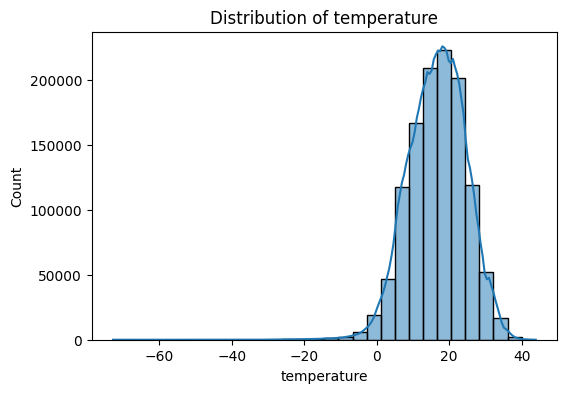

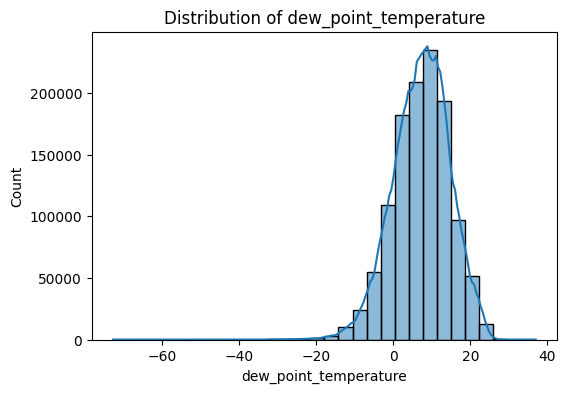

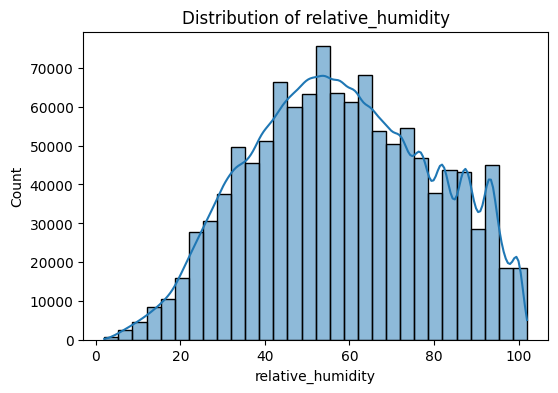

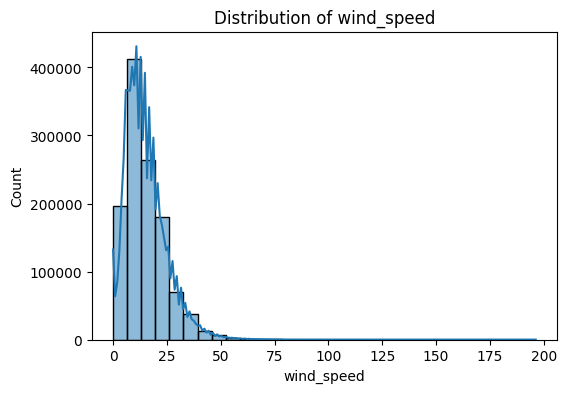

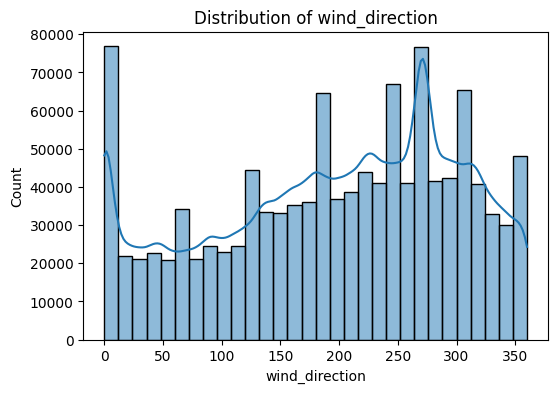

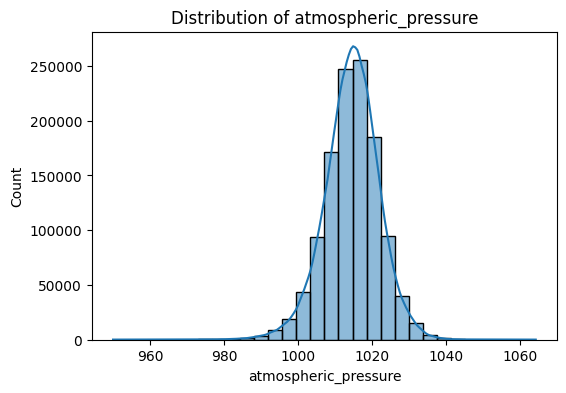

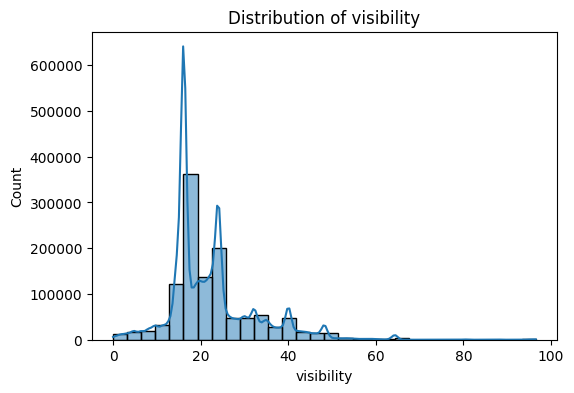

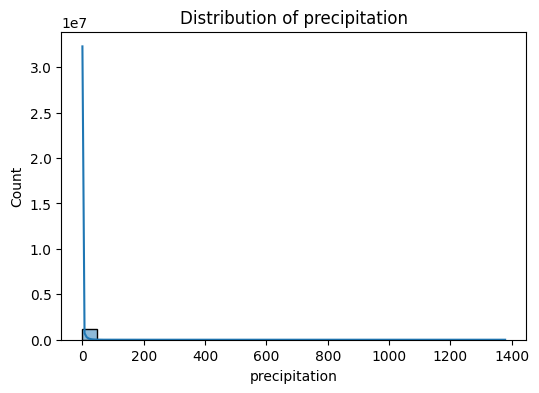

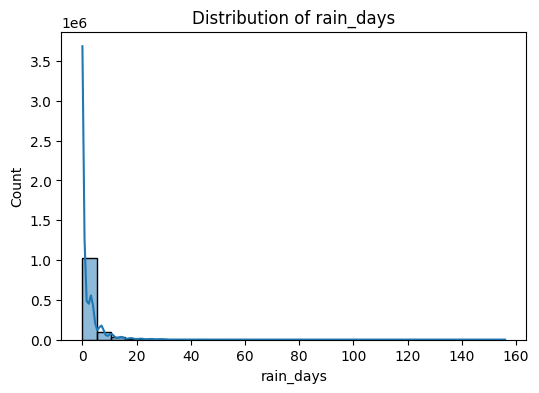

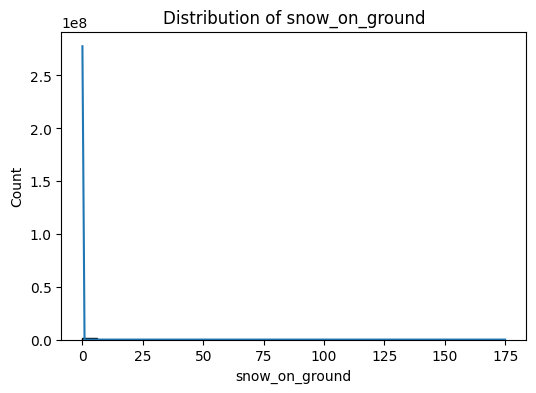

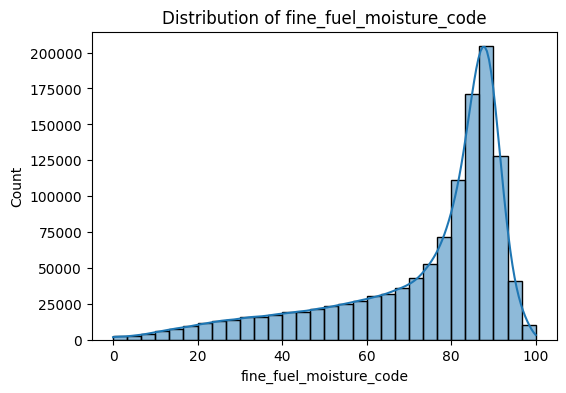

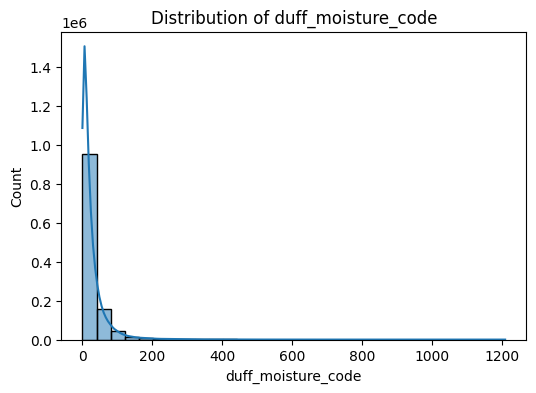

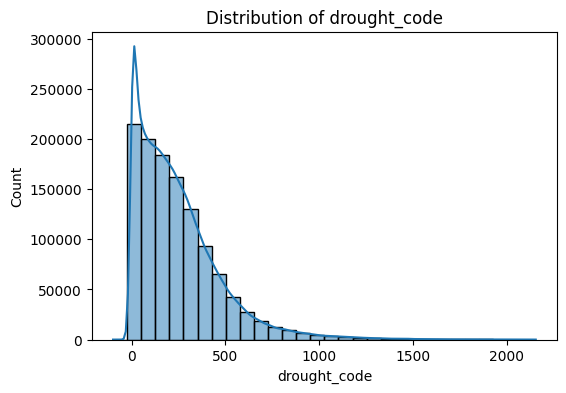

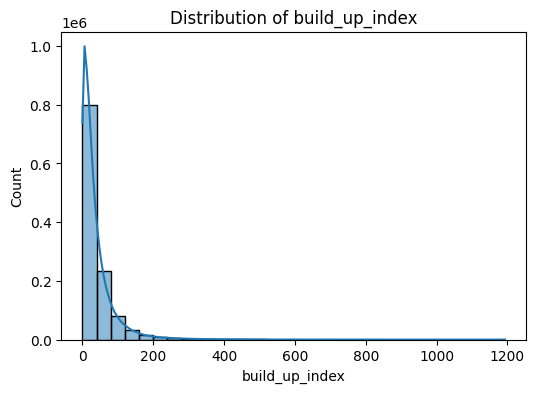

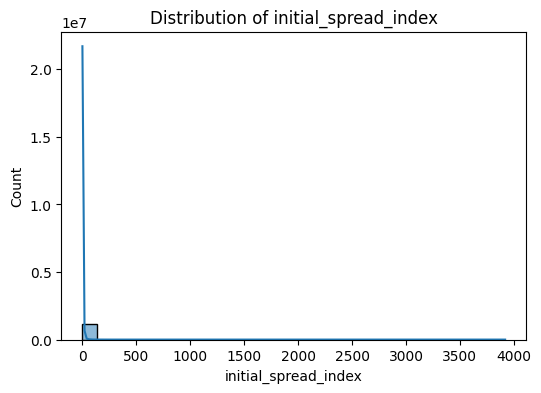

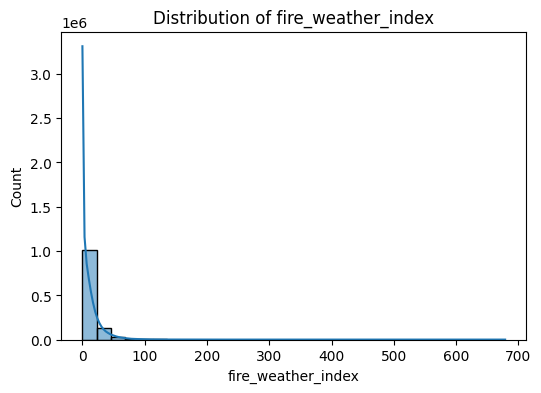

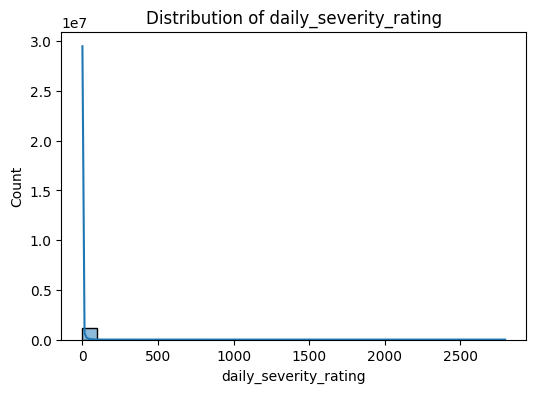

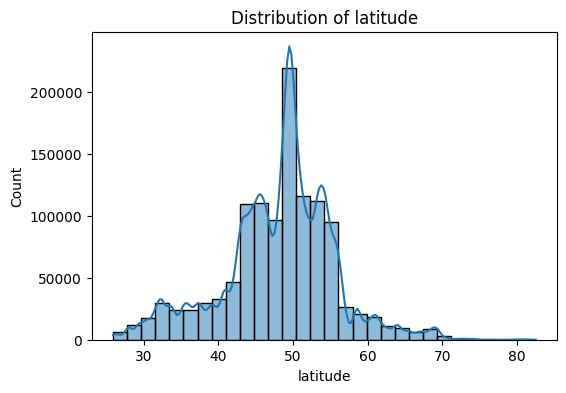

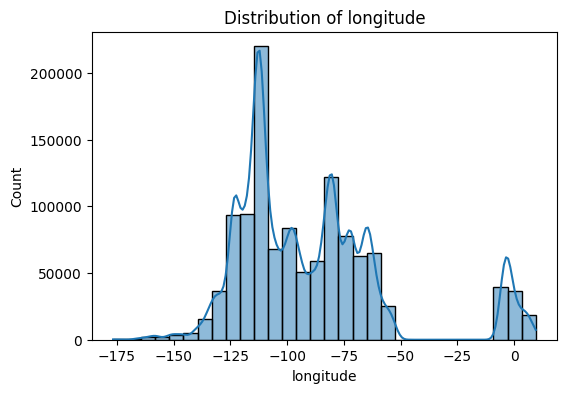

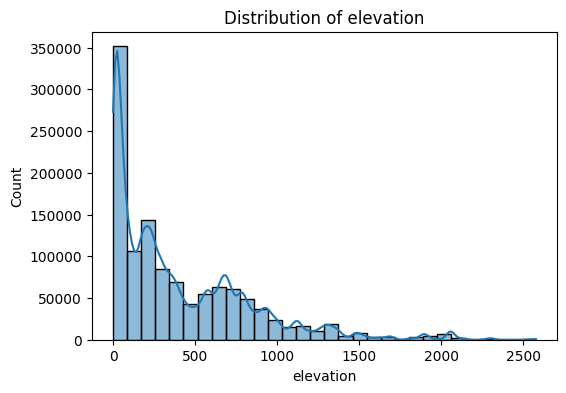

In [7]:
#Univariate Analysis

for col in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


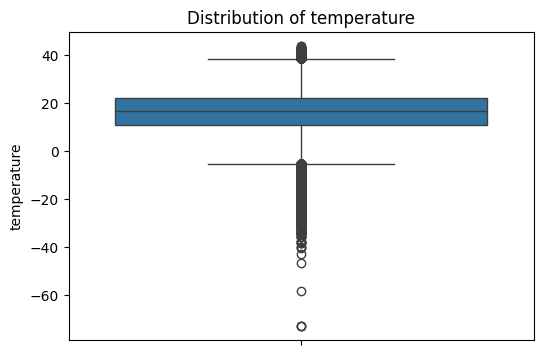

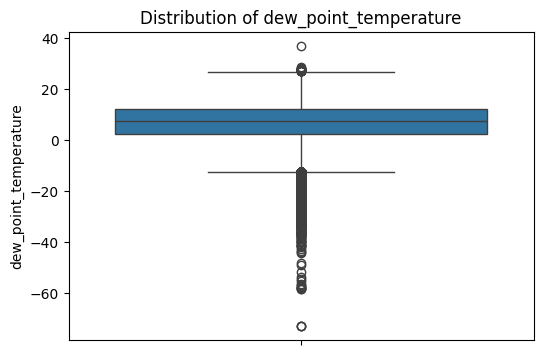

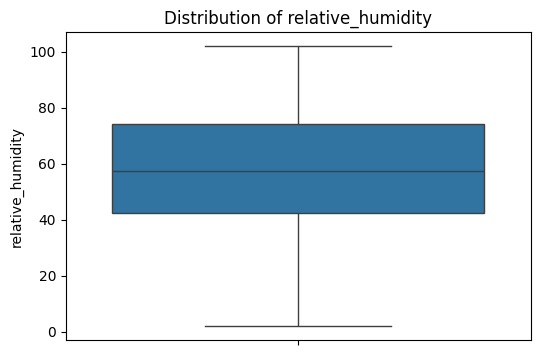

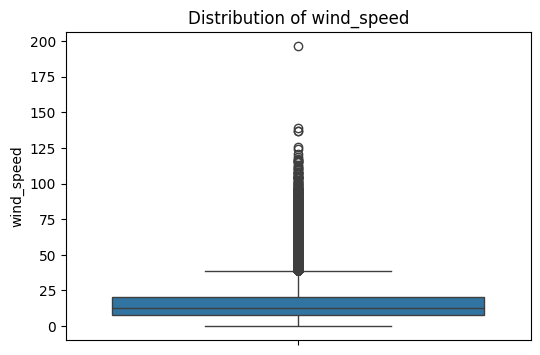

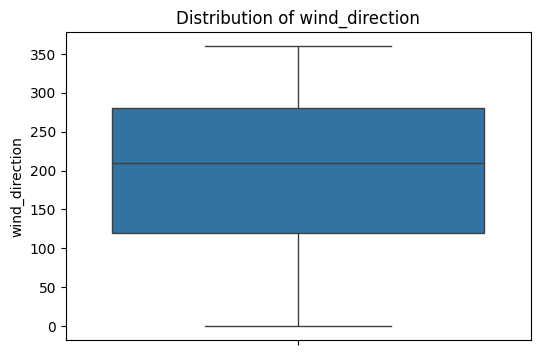

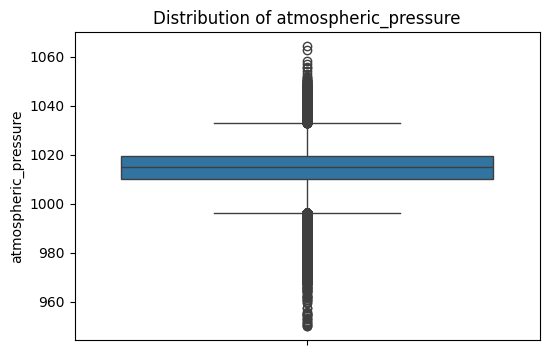

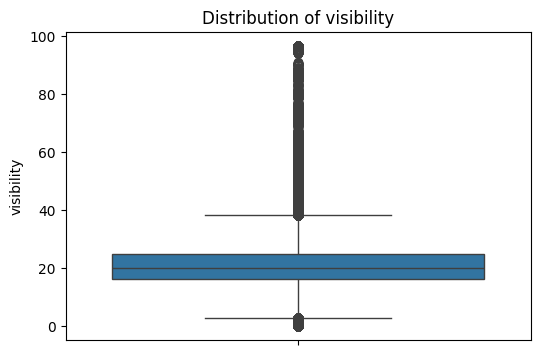

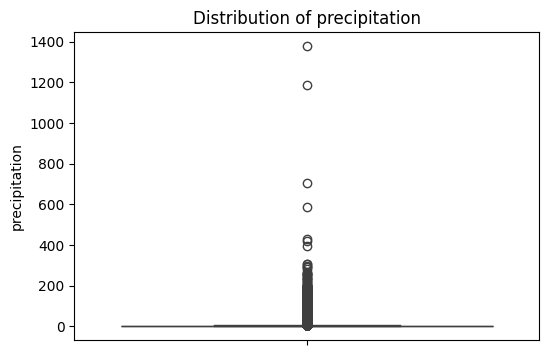

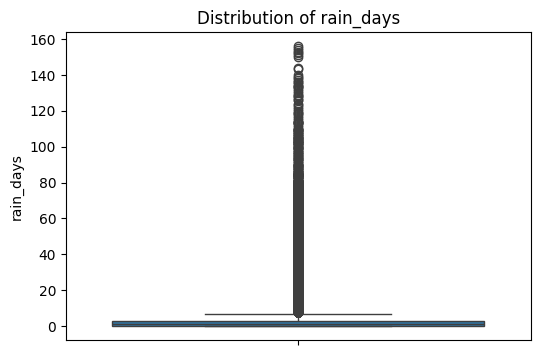

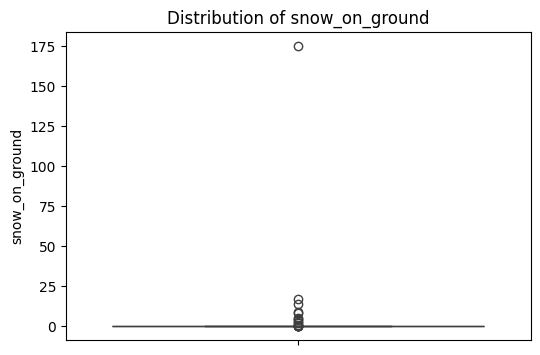

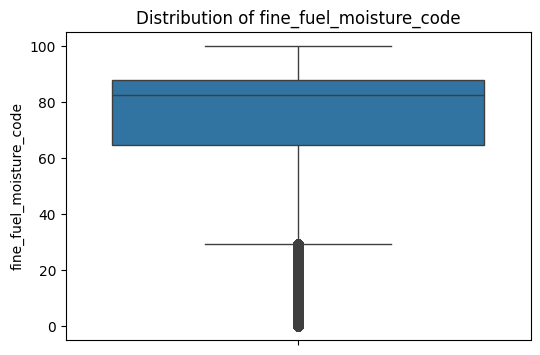

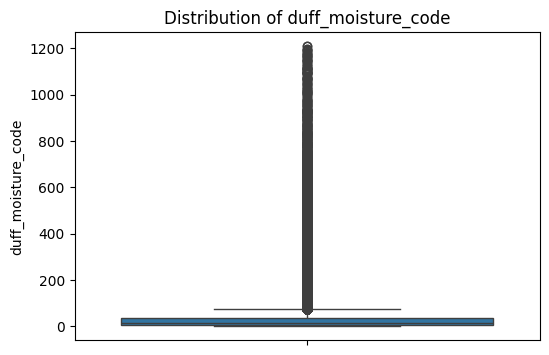

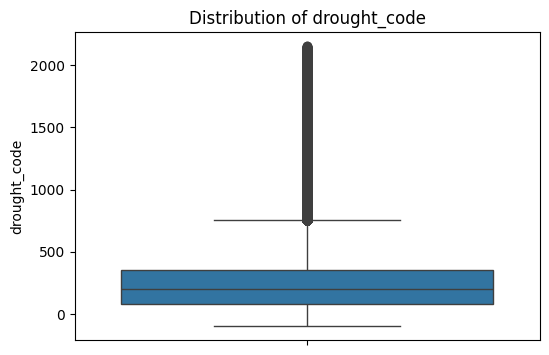

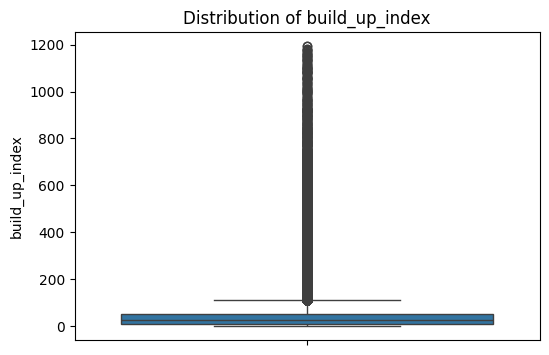

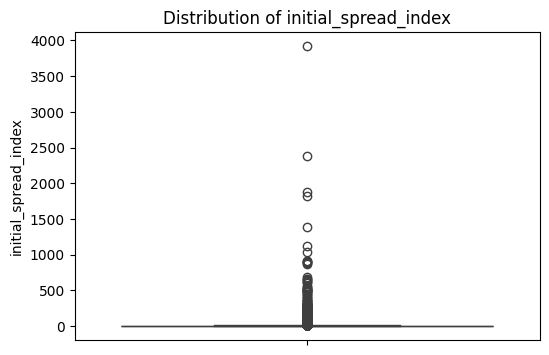

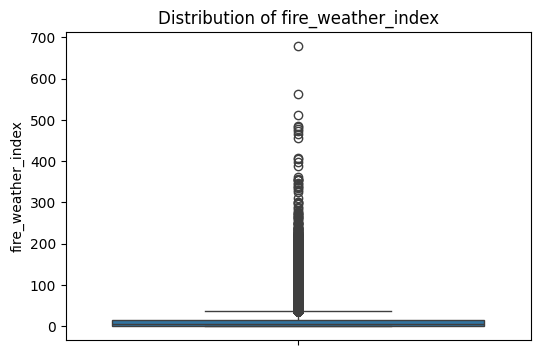

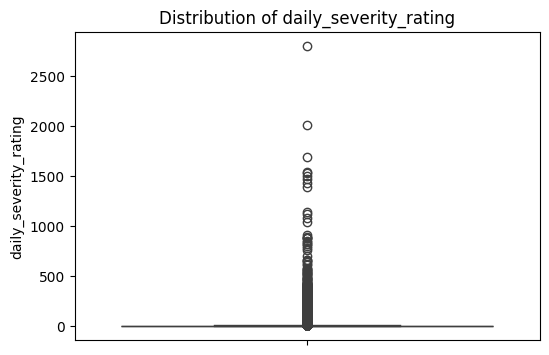

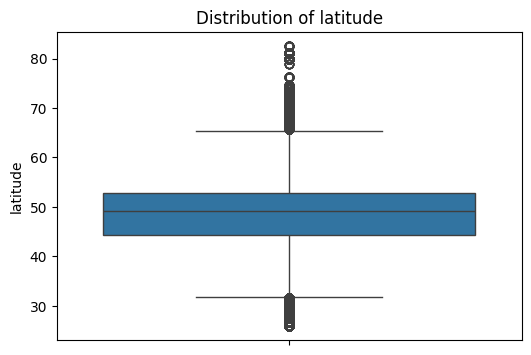

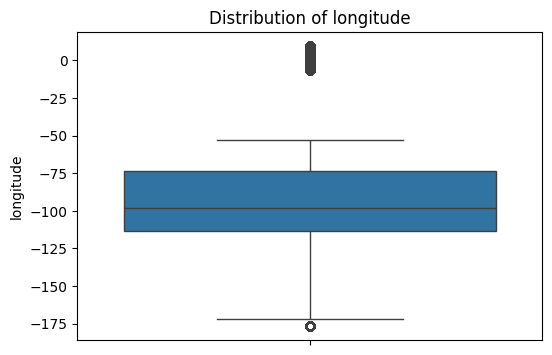

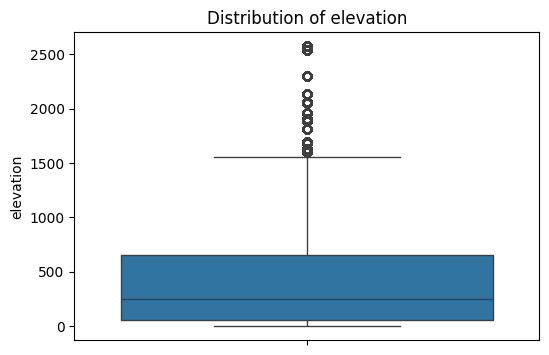

In [10]:
#Univariate Analysis

for col in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = data[col])
    plt.title(f'Distribution of {col}')
    plt.show()


Correlations with target variable:
 fire_weather_index         1.000000
daily_severity_rating      0.850684
initial_spread_index       0.772619
build_up_index             0.700306
duff_moisture_code         0.660967
drought_code               0.565105
fine_fuel_moisture_code    0.530371
rain_days                  0.442187
temperature                0.430199
elevation                  0.409024
wind_speed                 0.288815
wind_direction             0.048333
visibility                 0.011964
snow_on_ground            -0.000368
atmospheric_pressure      -0.072115
dew_point_temperature     -0.173096
latitude                  -0.186152
longitude                 -0.199571
precipitation             -0.221897
relative_humidity         -0.617819
Name: fire_weather_index, dtype: float64


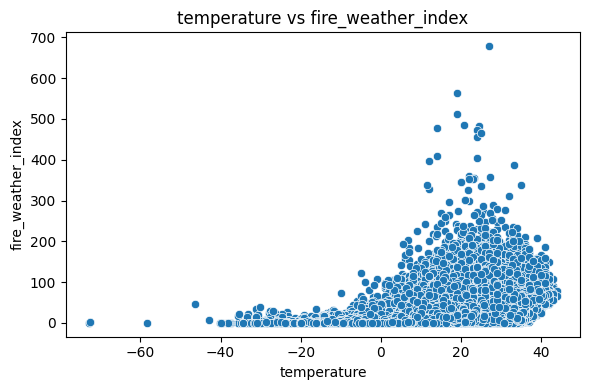

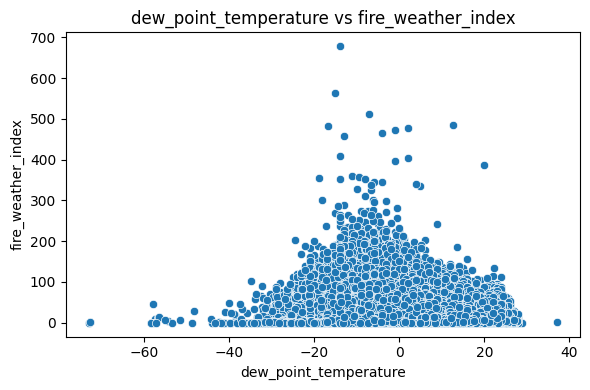

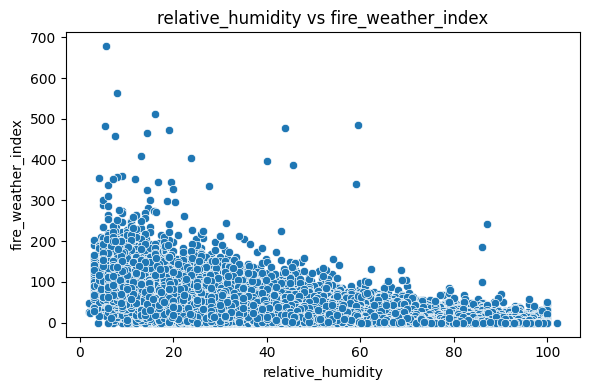

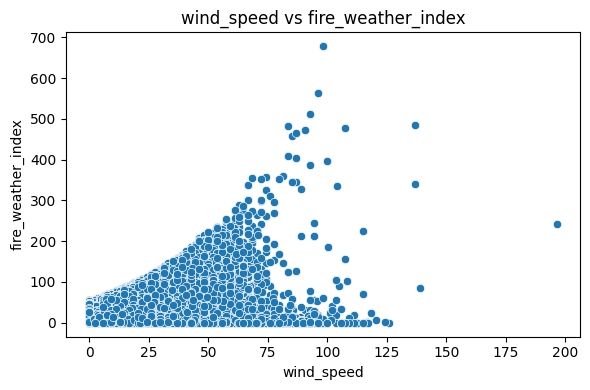

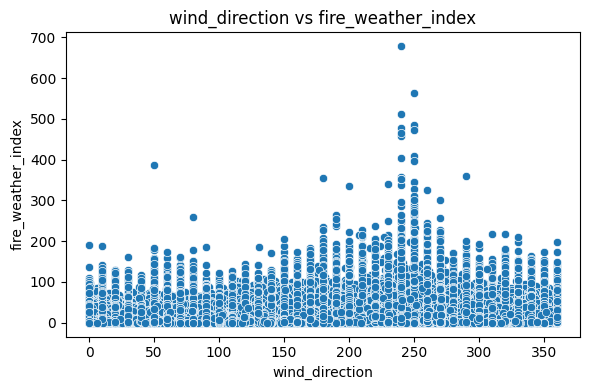

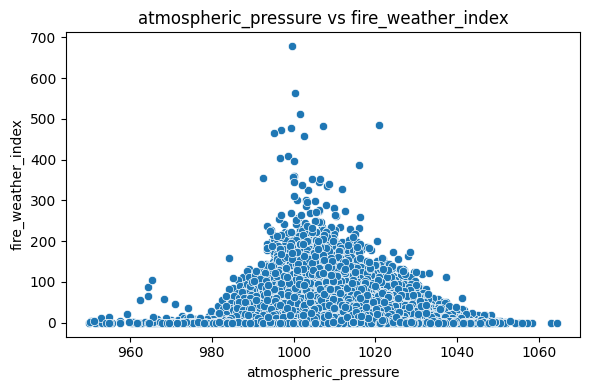

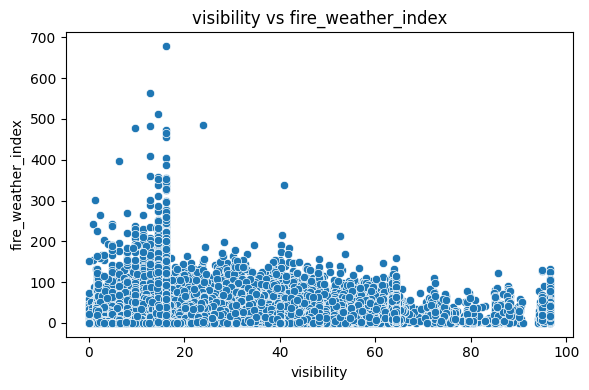

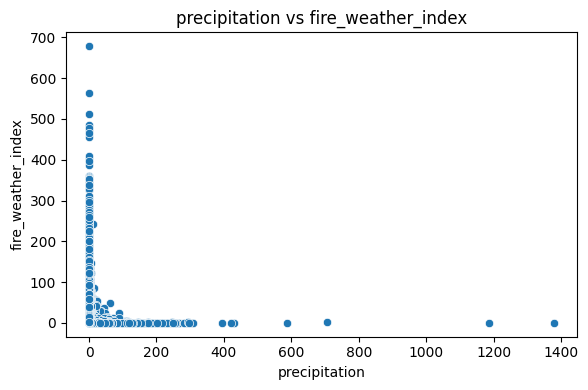

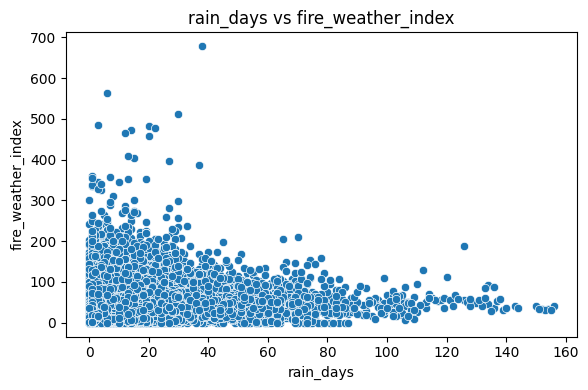

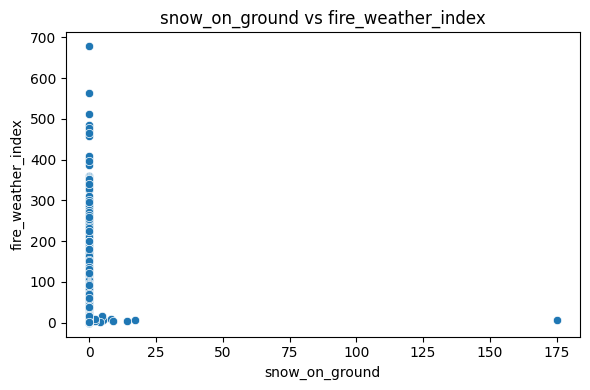

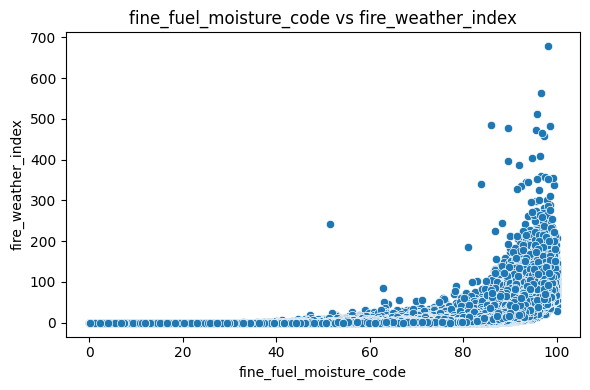

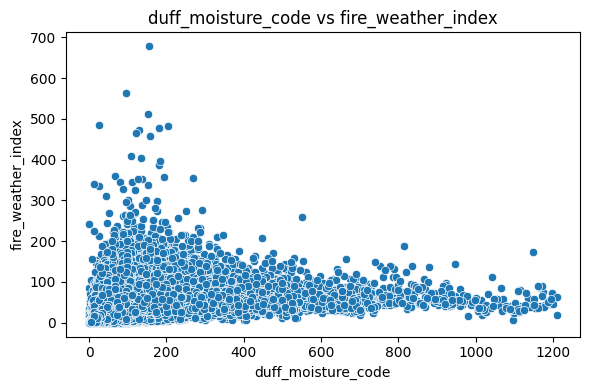

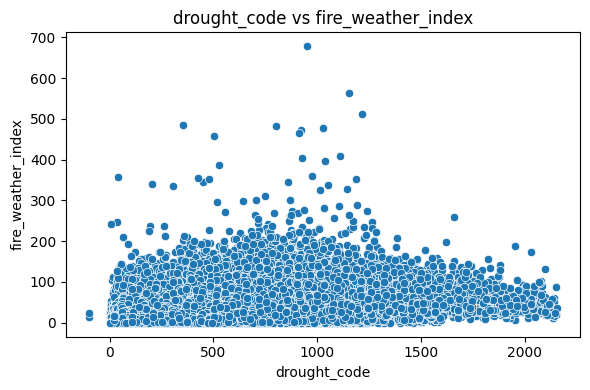

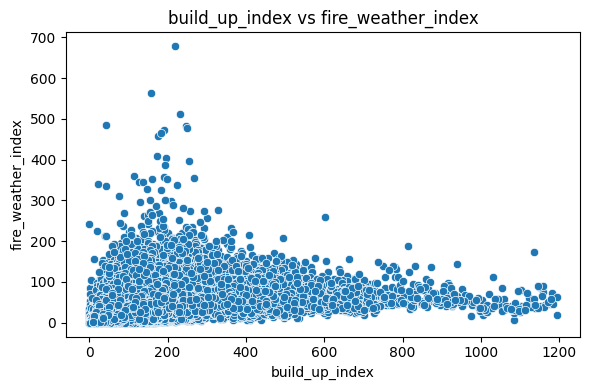

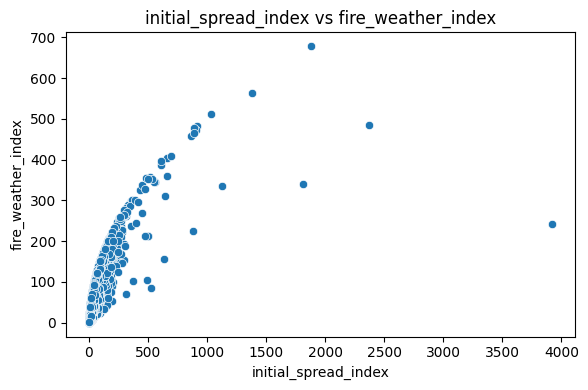

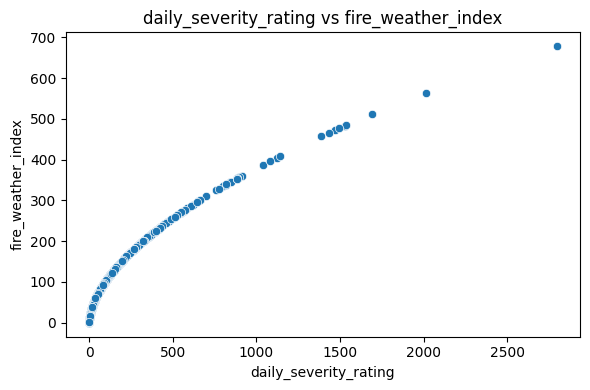

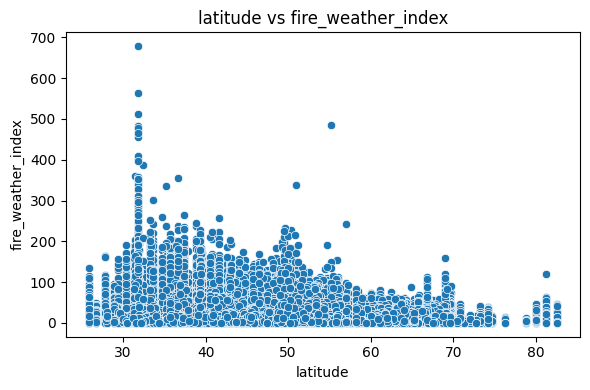

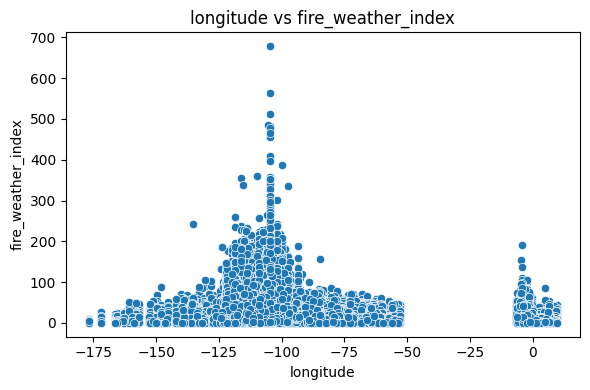

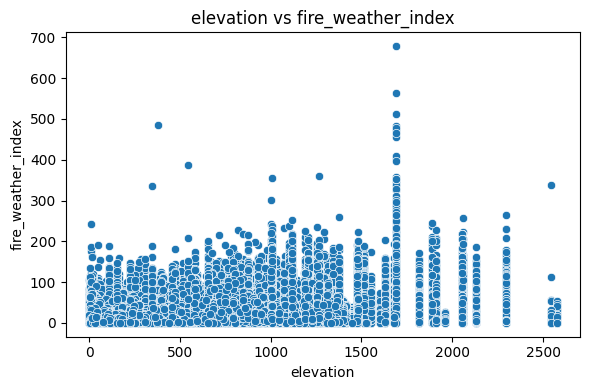

In [14]:
target = 'fire_weather_index'

numeric_data = data.select_dtypes(include=['number'])
correlations = numeric_data.corr()[target].sort_values(ascending=False)
print("Correlations with target variable:\n", correlations)

# Scatter plots for each feature vs. target variable
features = [col for col in data.columns if col != target and data[col].dtype != 'object']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


In [15]:
df_sample = data.sample(n=4000, random_state=42)  
print(df_sample.shape)

(4000, 21)


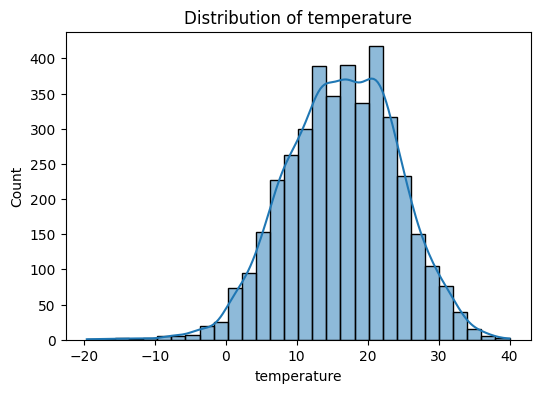

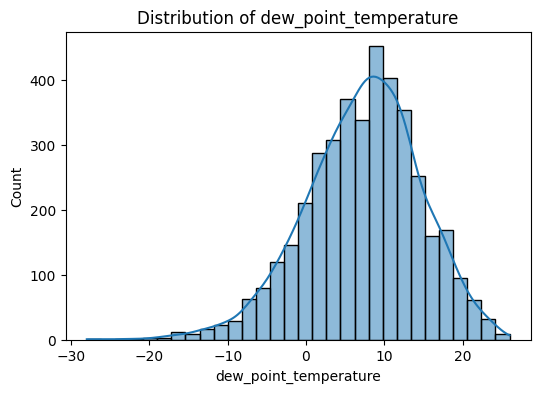

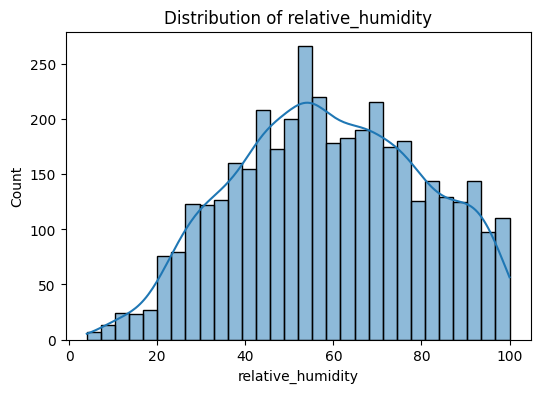

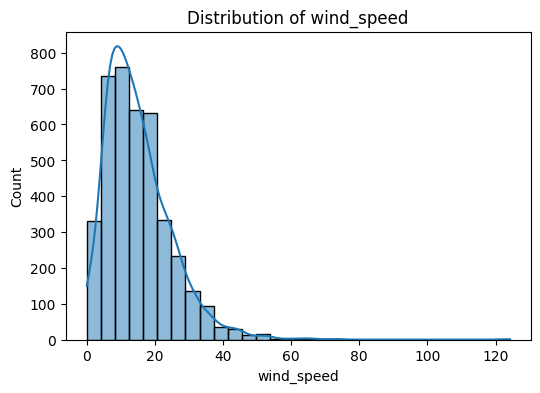

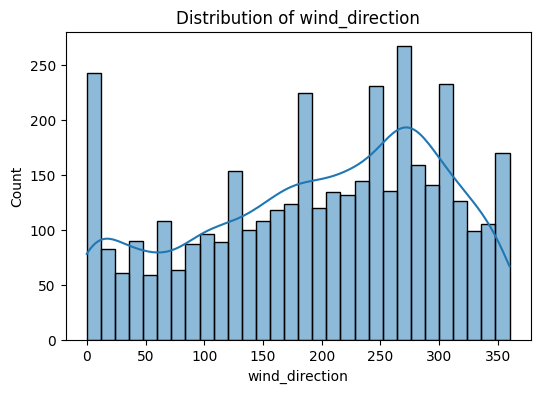

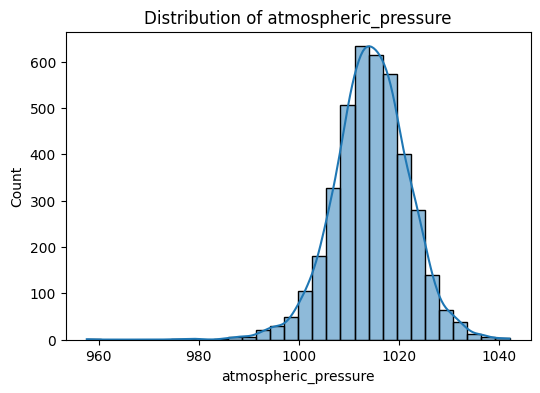

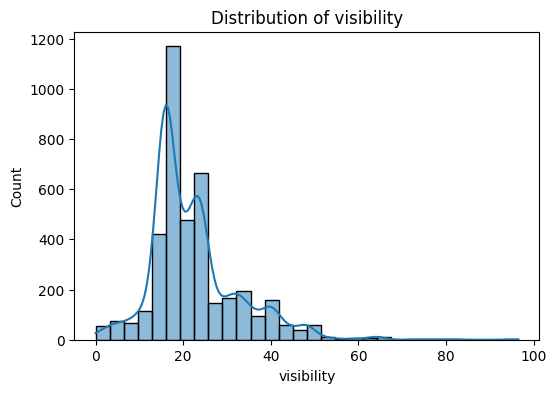

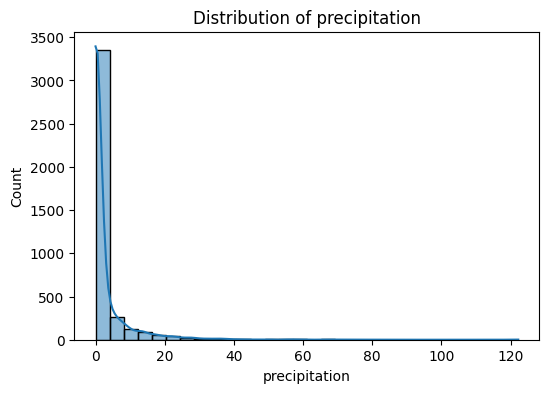

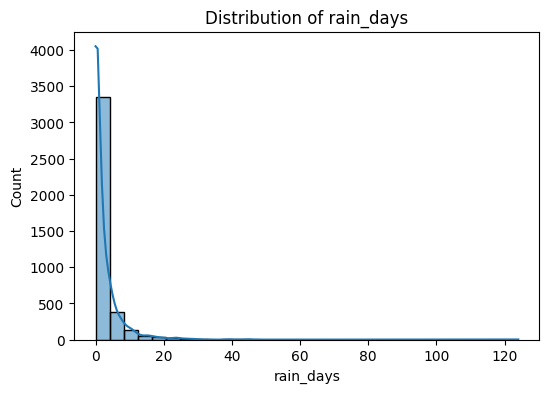

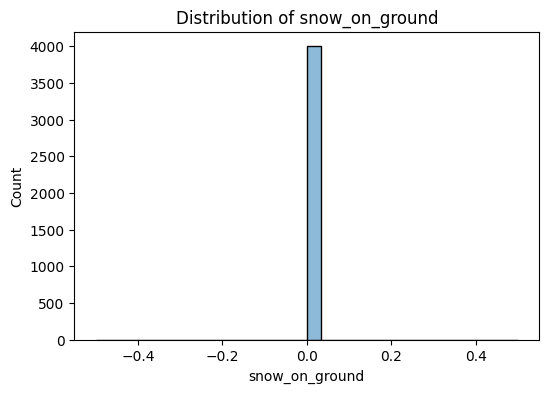

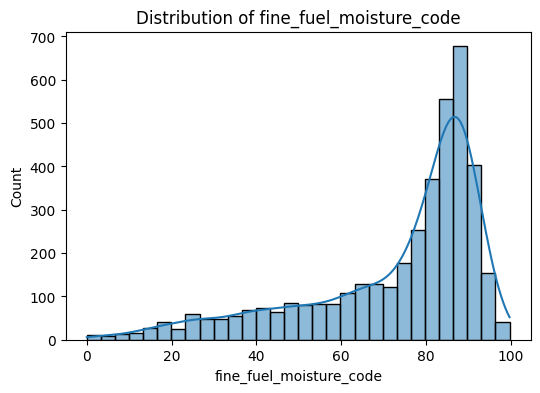

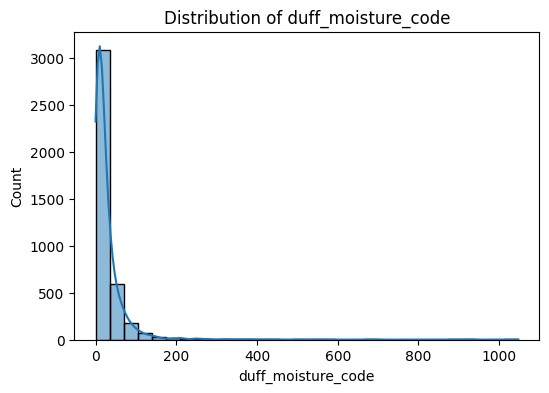

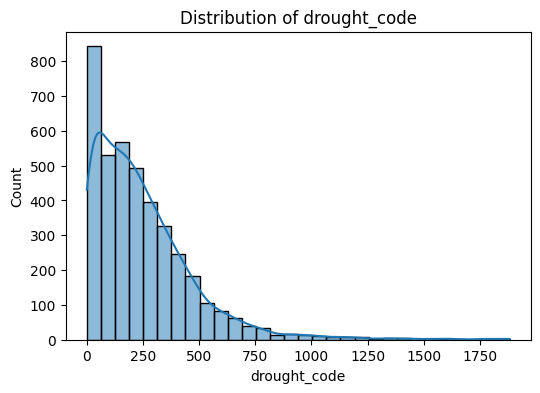

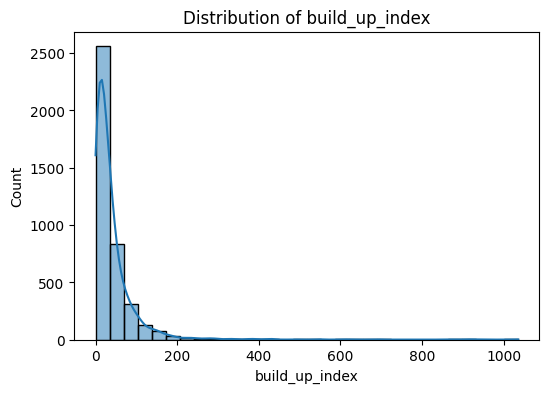

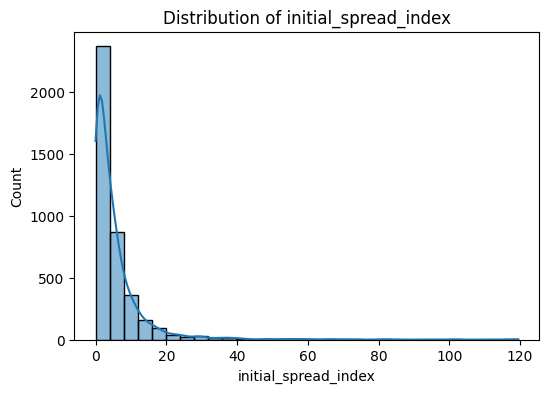

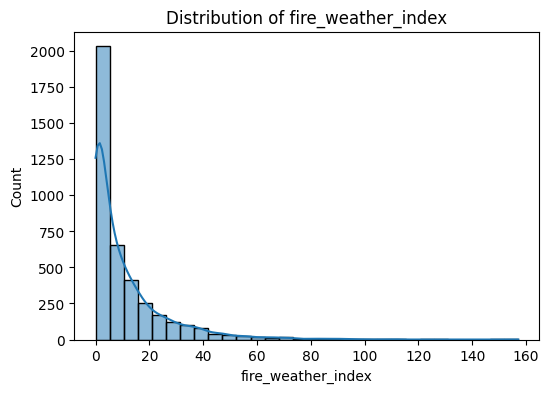

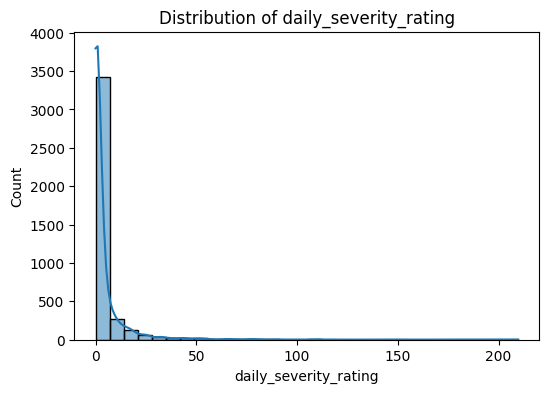

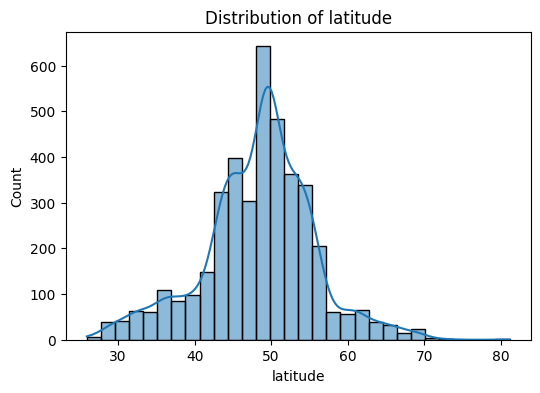

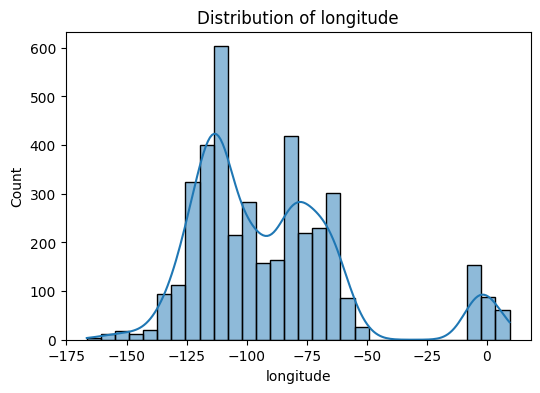

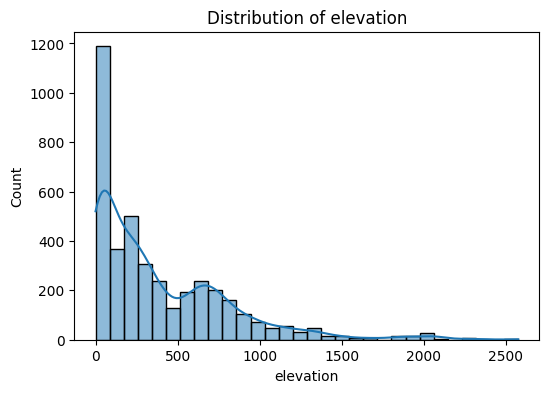

In [16]:
#Univariate Analysis

for col in df_sample.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_sample[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


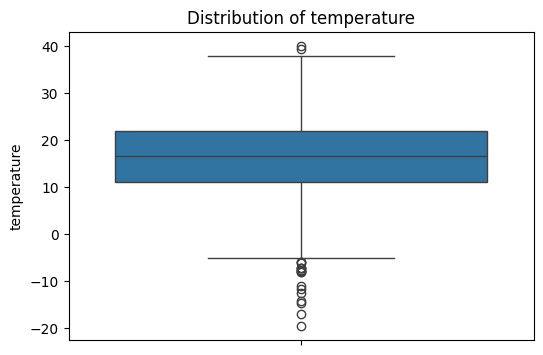

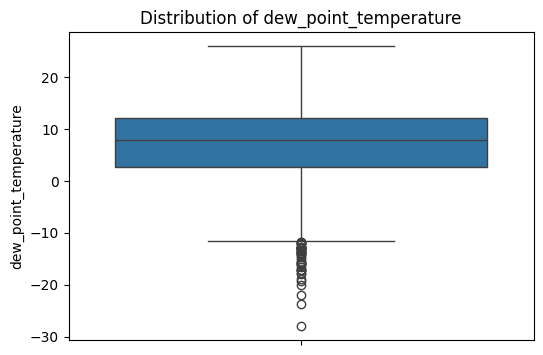

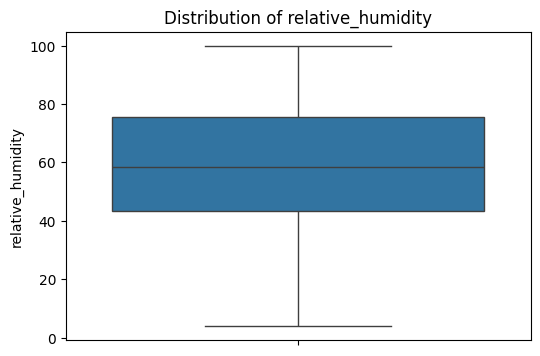

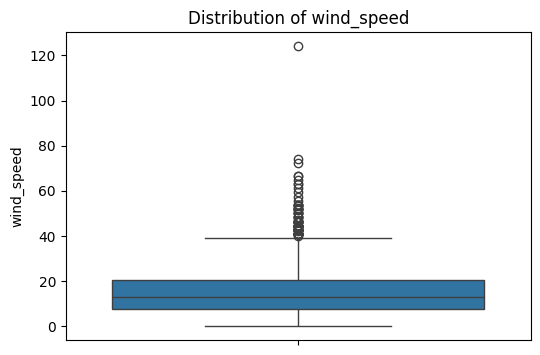

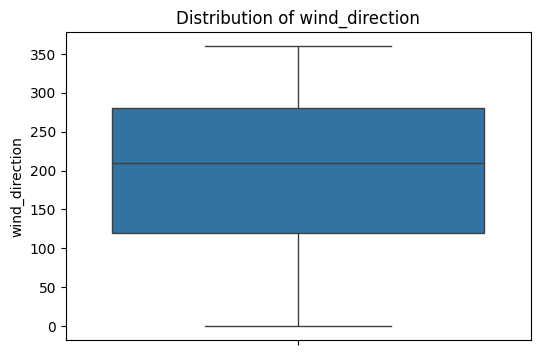

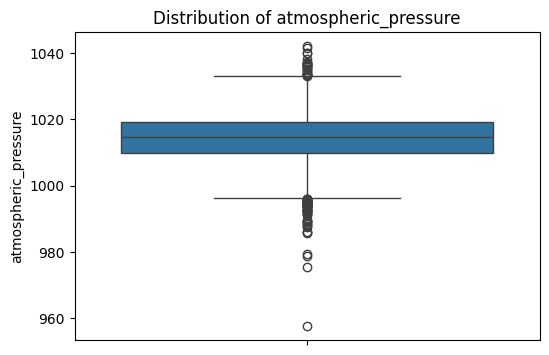

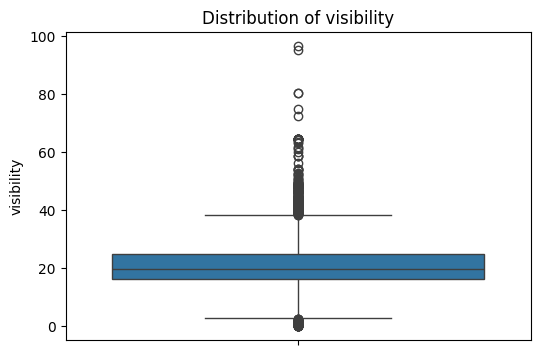

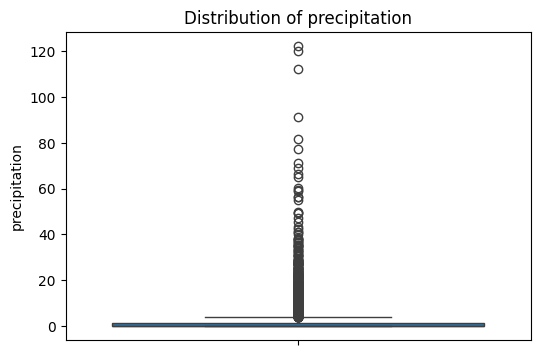

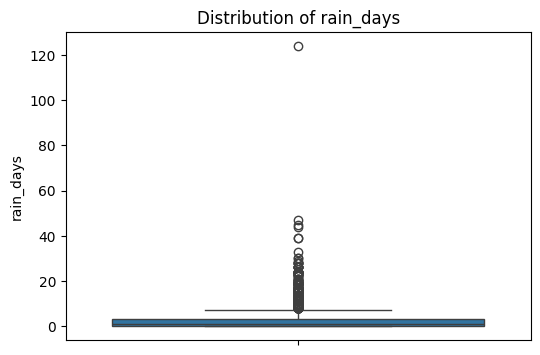

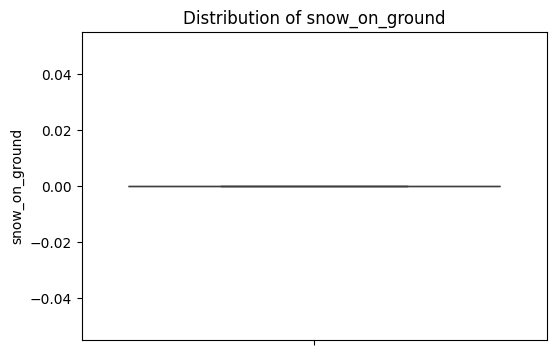

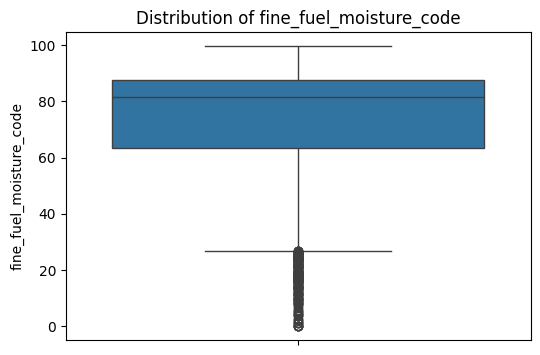

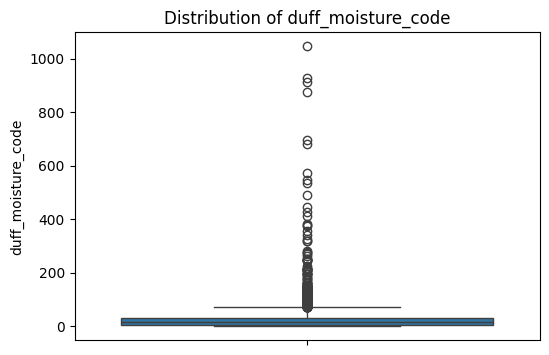

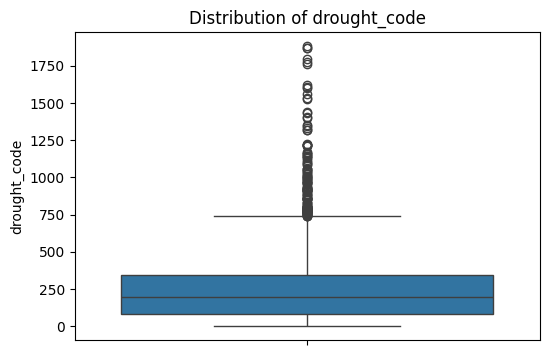

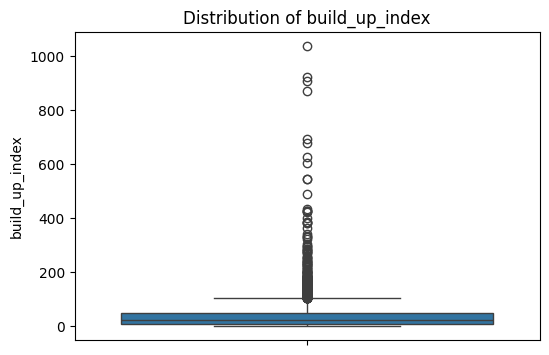

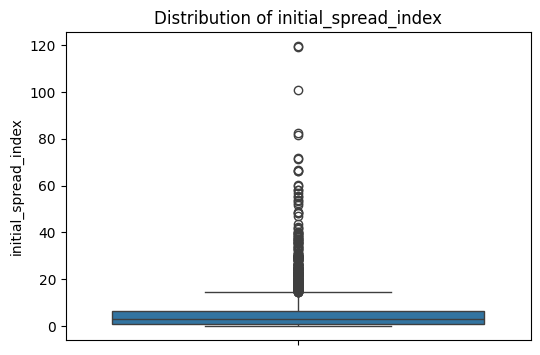

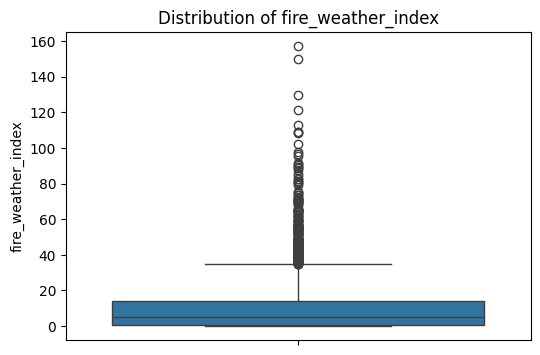

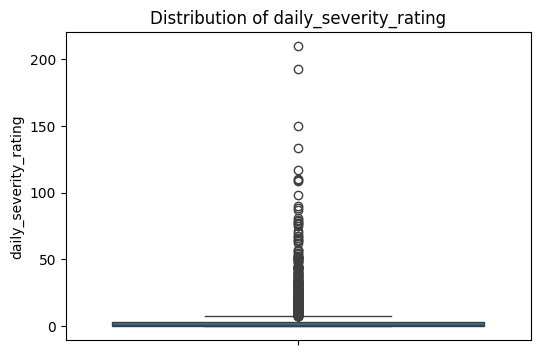

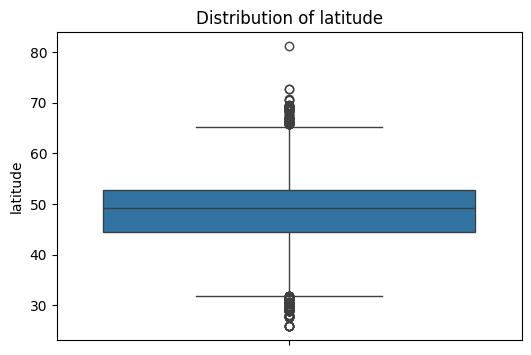

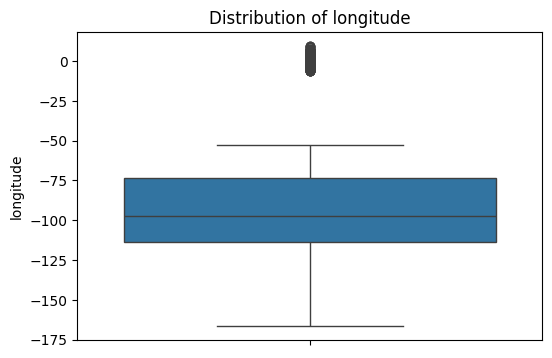

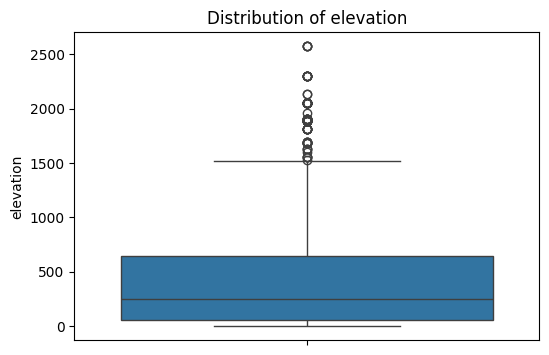

In [17]:
#Univariate Analysis

for col in df_sample.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = df_sample[col])
    plt.title(f'Distribution of {col}')
    plt.show()


Correlations with target variable:
 fire_weather_index         1.000000
daily_severity_rating      0.909886
initial_spread_index       0.892885
build_up_index             0.652184
duff_moisture_code         0.589460
drought_code               0.569352
fine_fuel_moisture_code    0.539630
temperature                0.435907
rain_days                  0.423825
elevation                  0.414850
wind_speed                 0.269946
wind_direction             0.051133
visibility                 0.037566
atmospheric_pressure      -0.078380
latitude                  -0.174072
dew_point_temperature     -0.192698
longitude                 -0.193402
precipitation             -0.227914
relative_humidity         -0.637423
snow_on_ground                  NaN
Name: fire_weather_index, dtype: float64


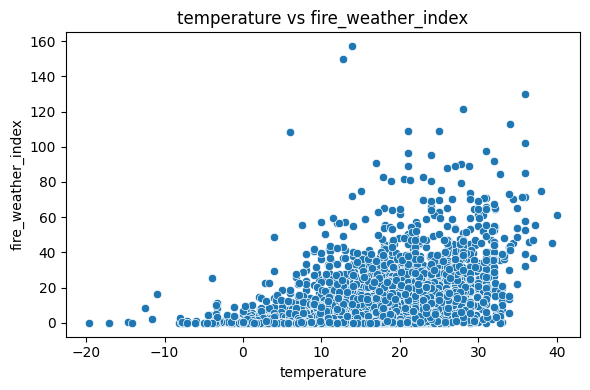

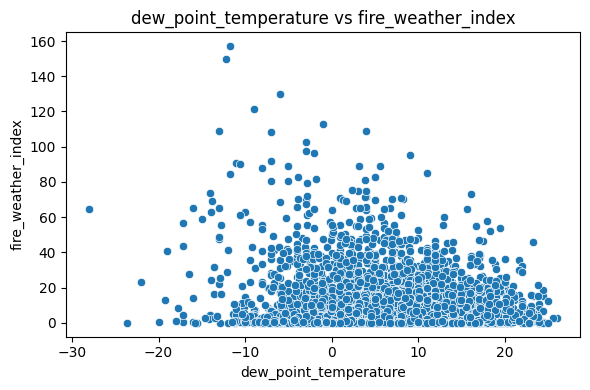

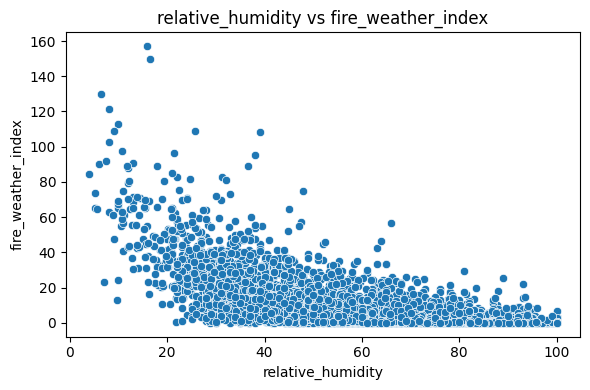

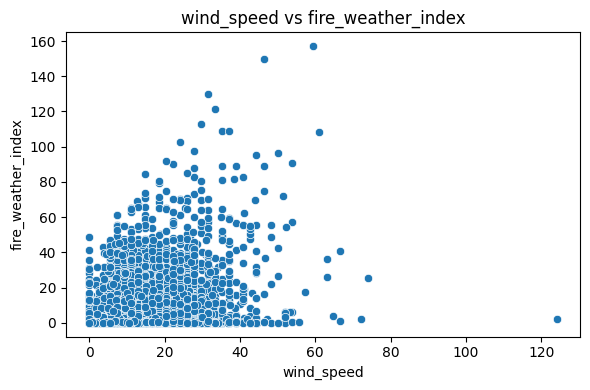

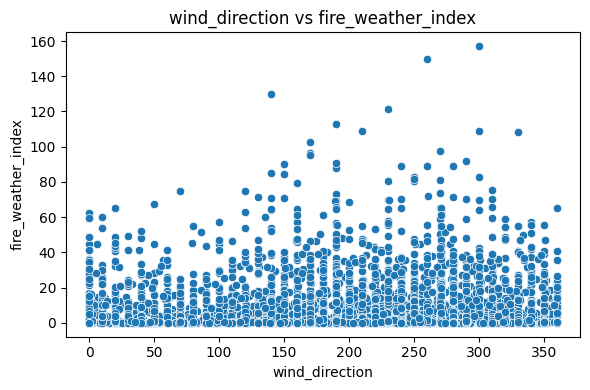

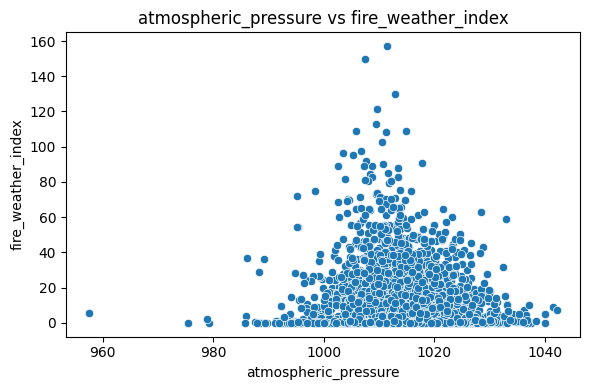

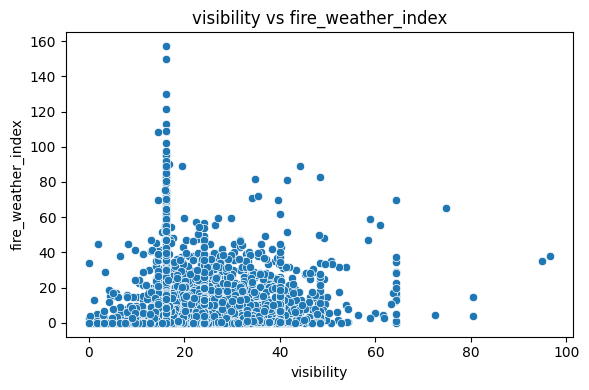

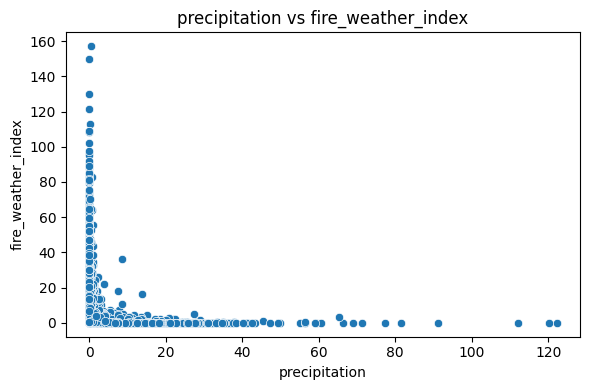

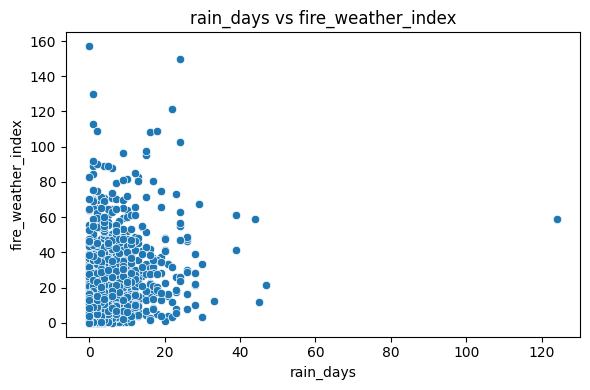

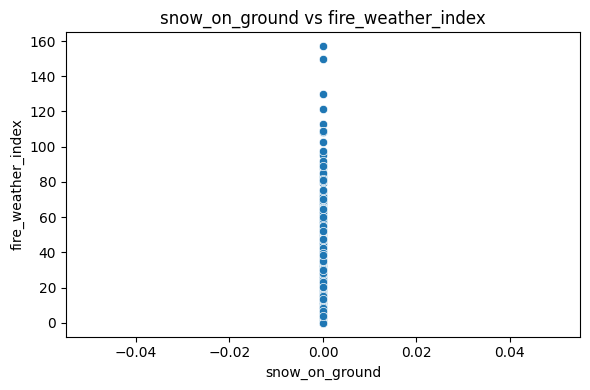

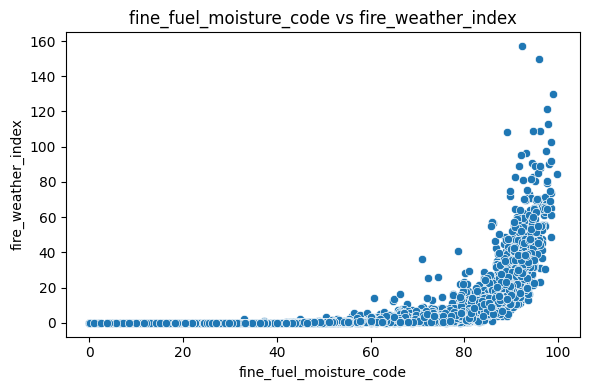

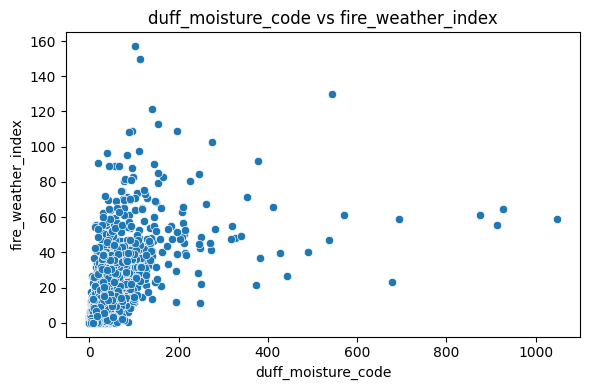

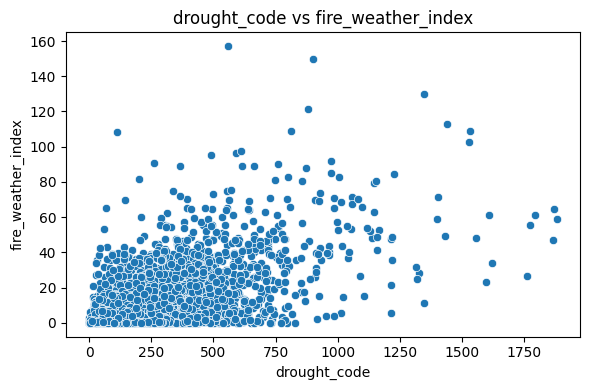

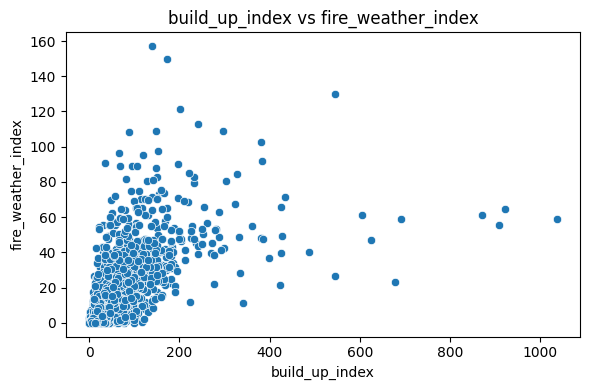

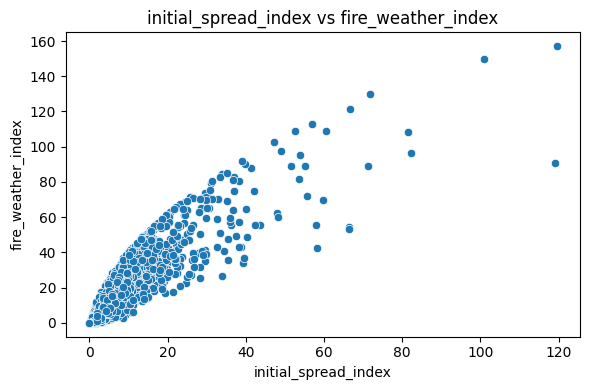

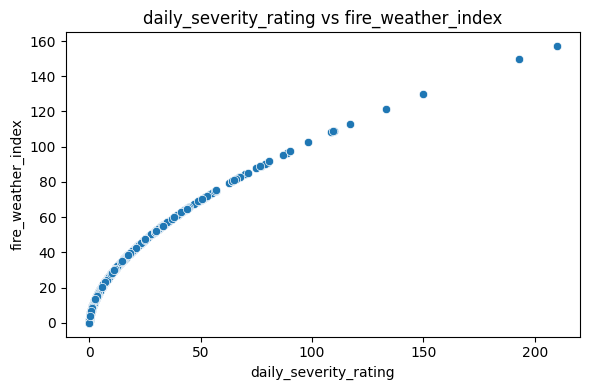

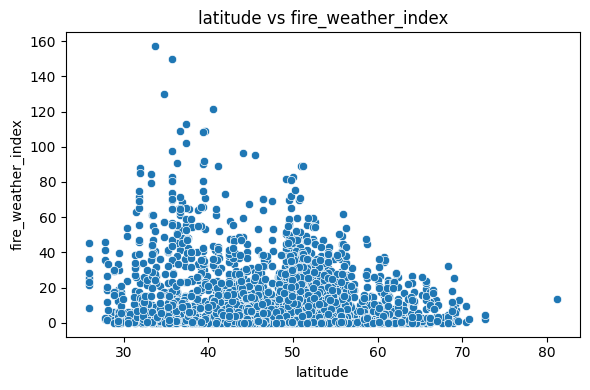

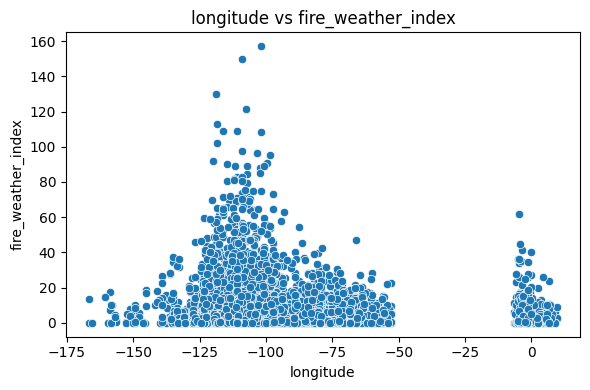

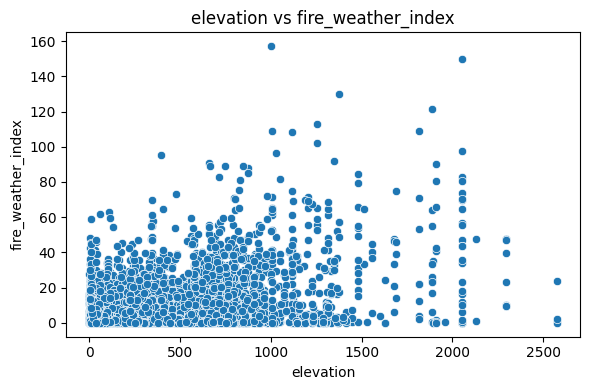

In [18]:
target = 'fire_weather_index'

numeric_data = df_sample.select_dtypes(include=['number'])
correlations = numeric_data.corr()[target].sort_values(ascending=False)
print("Correlations with target variable:\n", correlations)

# Scatter plots for each feature vs. target variable
features = [col for col in df_sample.columns if col != target and df_sample[col].dtype != 'object']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_sample[feature], y=df_sample[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


Correlations with target variable:
 fire_weather_index         1.000000
daily_severity_rating      0.909886
initial_spread_index       0.892885
build_up_index             0.652184
duff_moisture_code         0.589460
drought_code               0.569352
fine_fuel_moisture_code    0.539630
temperature                0.435907
rain_days                  0.423825
elevation                  0.414850
wind_speed                 0.269946
wind_direction             0.051133
visibility                 0.037566
atmospheric_pressure      -0.078380
latitude                  -0.174072
dew_point_temperature     -0.192698
longitude                 -0.193402
precipitation             -0.227914
relative_humidity         -0.637423
snow_on_ground                  NaN
Name: fire_weather_index, dtype: float64


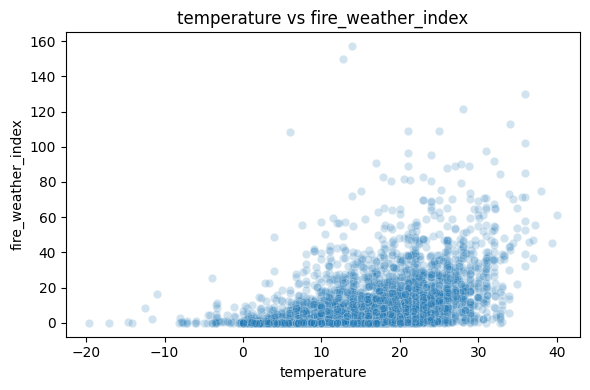

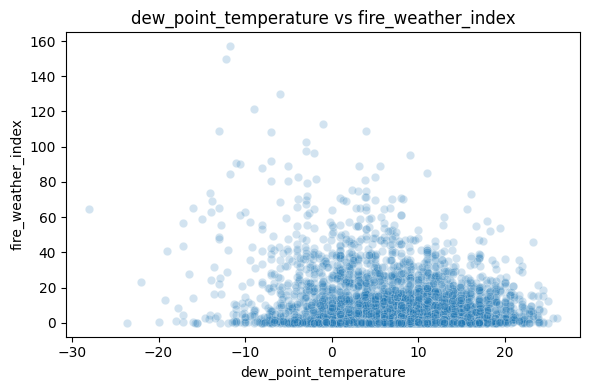

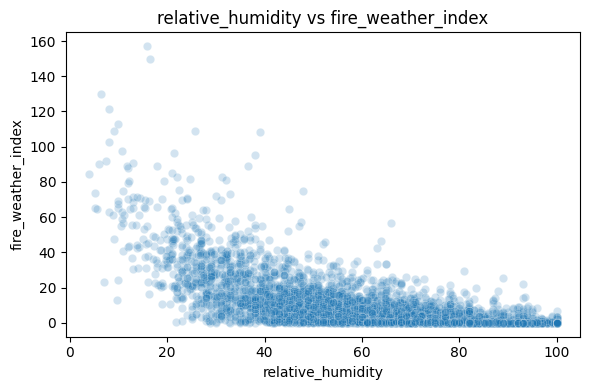

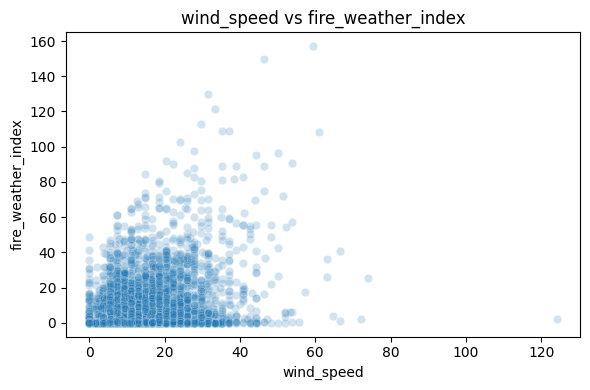

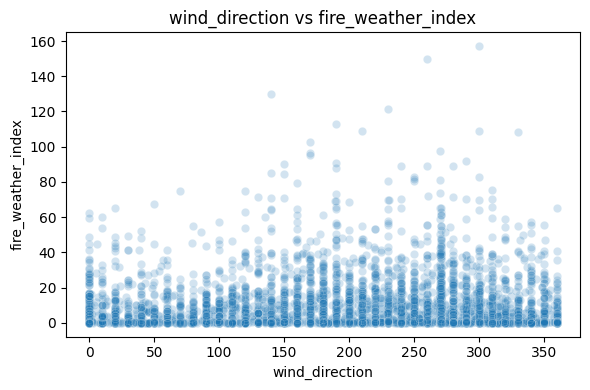

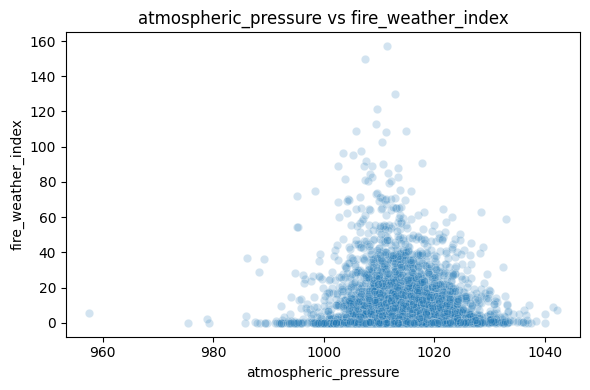

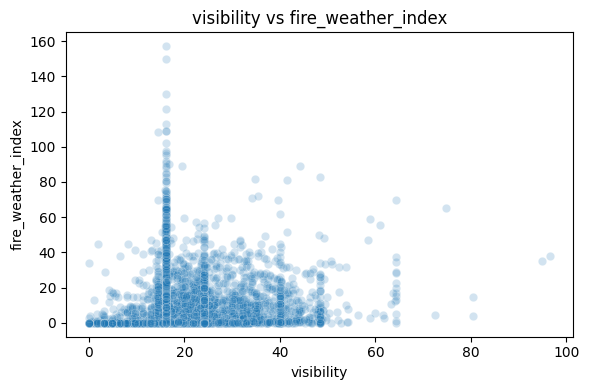

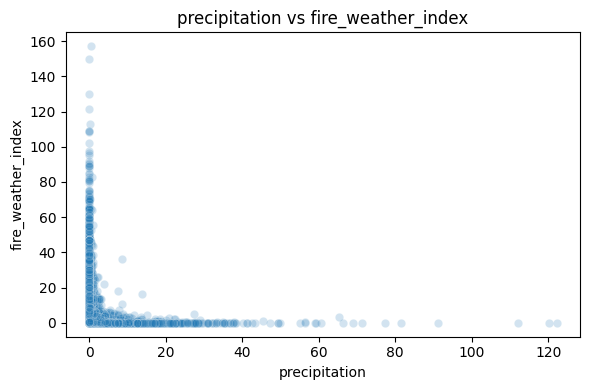

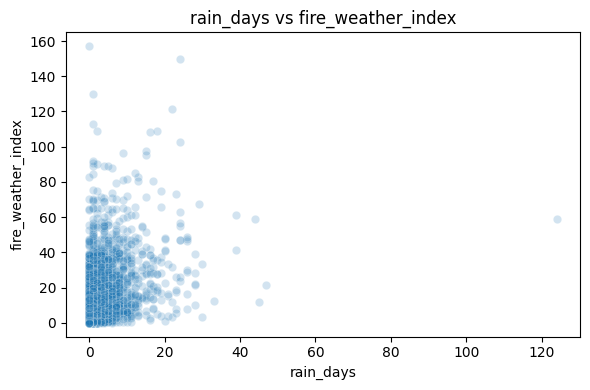

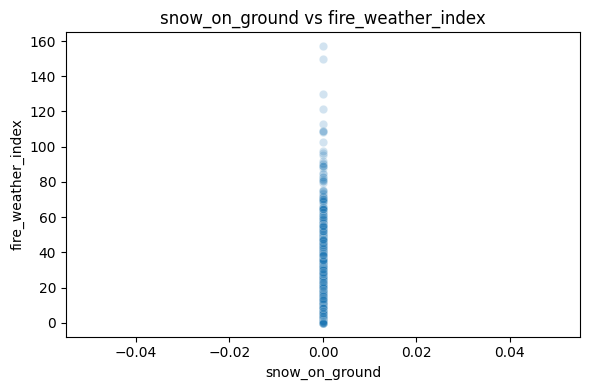

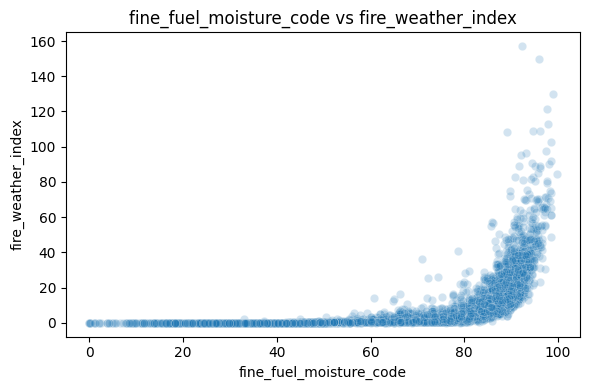

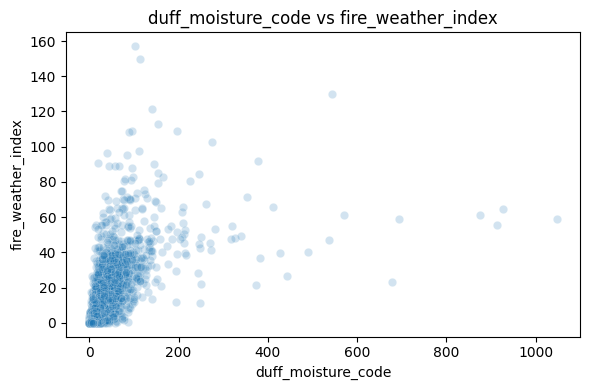

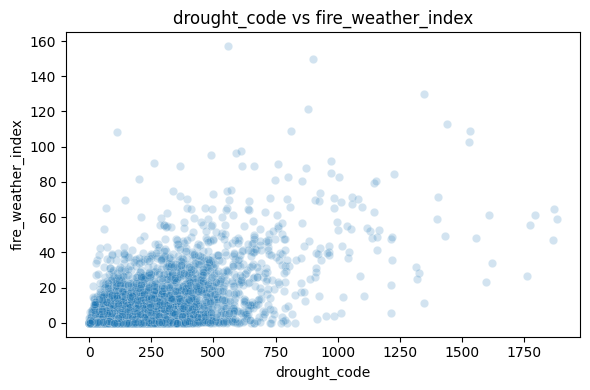

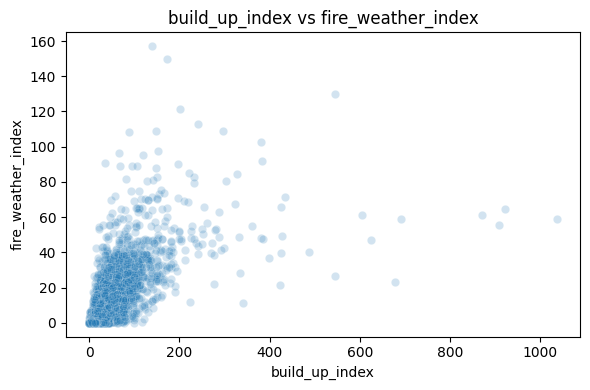

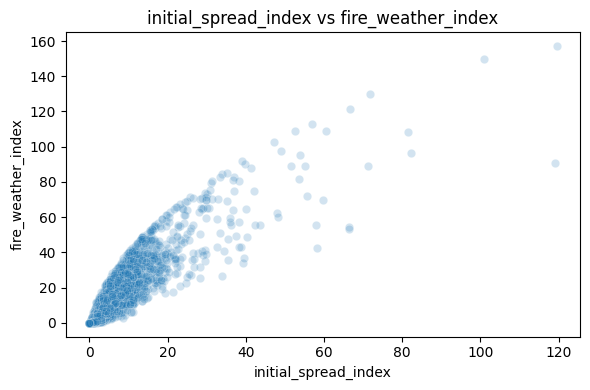

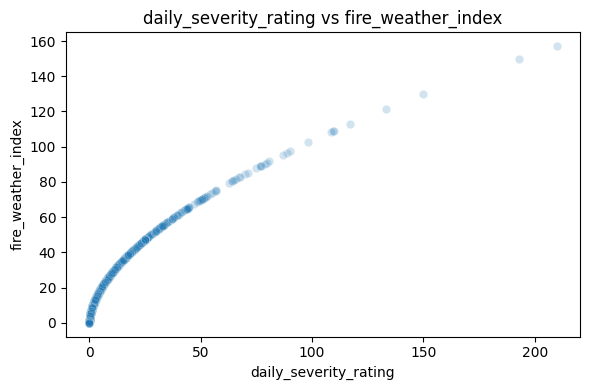

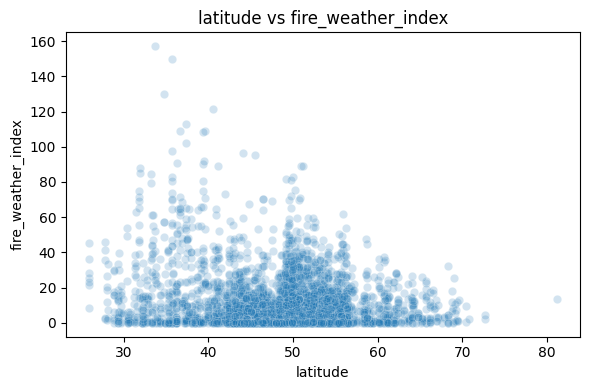

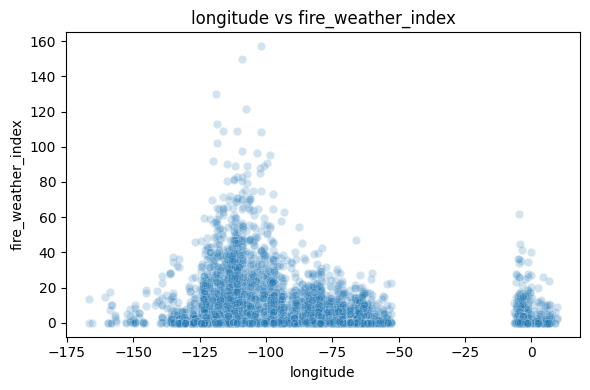

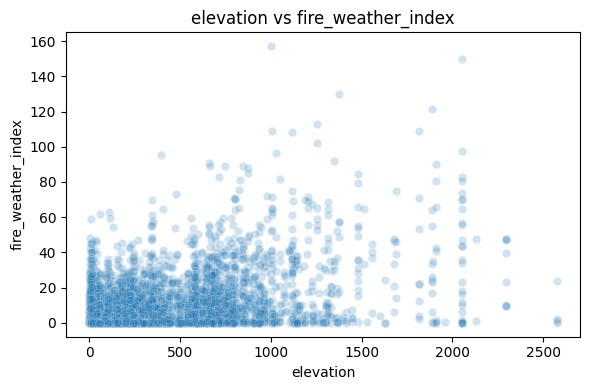

In [19]:
target = 'fire_weather_index'

numeric_data = df_sample.select_dtypes(include=['number'])
correlations = numeric_data.corr()[target].sort_values(ascending=False)
print("Correlations with target variable:\n", correlations)

# Scatter plots for each feature vs. target variable
features = [col for col in df_sample.columns if col != target and df_sample[col].dtype != 'object']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_sample[feature], y=df_sample[target],alpha= 0.2)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


Correlations with target variable:
 fire_weather_index         1.000000
daily_severity_rating      0.909886
initial_spread_index       0.892885
build_up_index             0.652184
duff_moisture_code         0.589460
drought_code               0.569352
fine_fuel_moisture_code    0.539630
temperature                0.435907
rain_days                  0.423825
elevation                  0.414850
wind_speed                 0.269946
wind_direction             0.051133
visibility                 0.037566
atmospheric_pressure      -0.078380
latitude                  -0.174072
dew_point_temperature     -0.192698
longitude                 -0.193402
precipitation             -0.227914
relative_humidity         -0.637423
snow_on_ground                  NaN
Name: fire_weather_index, dtype: float64


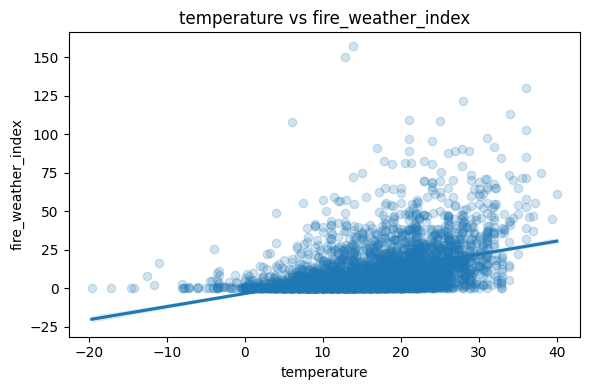

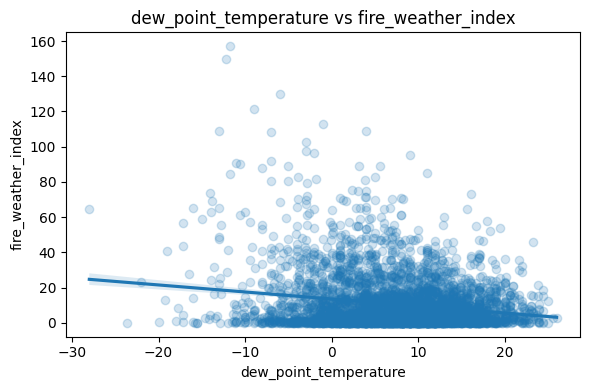

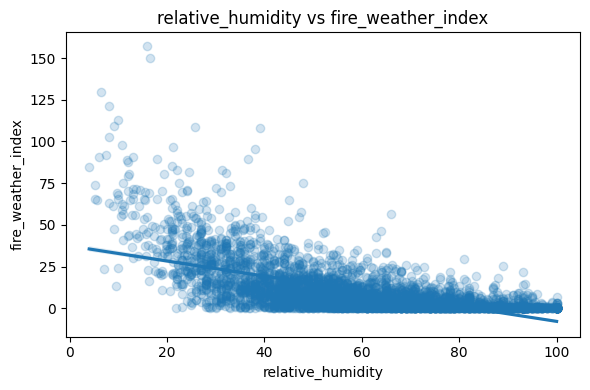

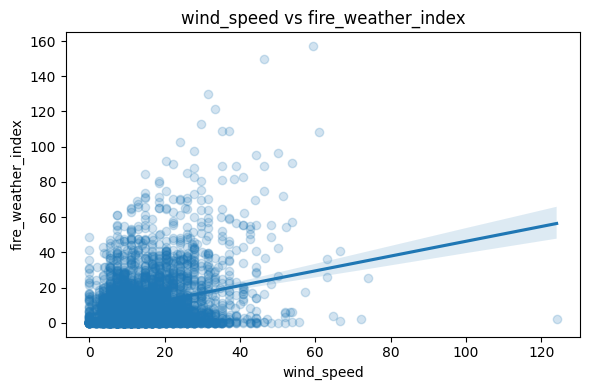

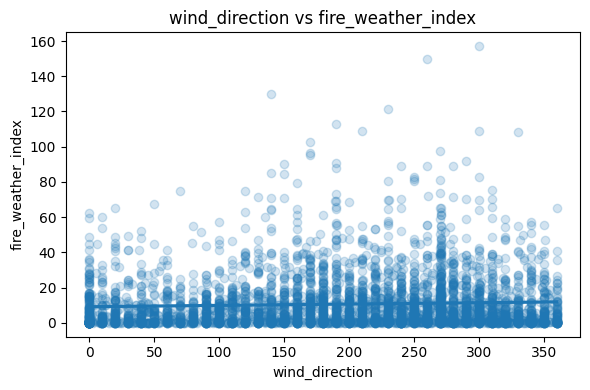

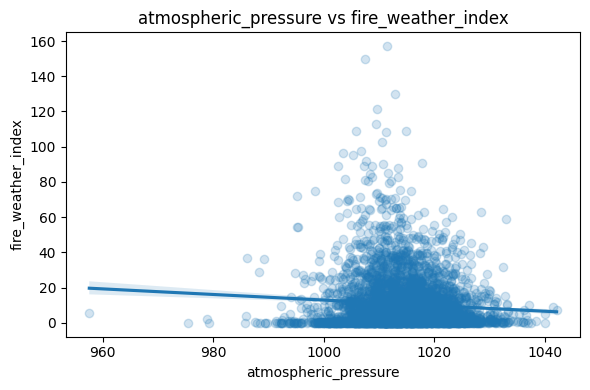

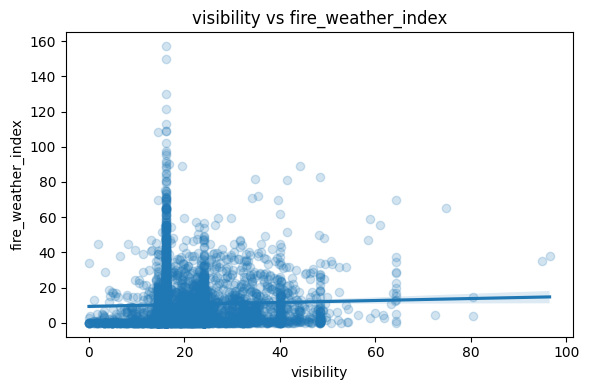

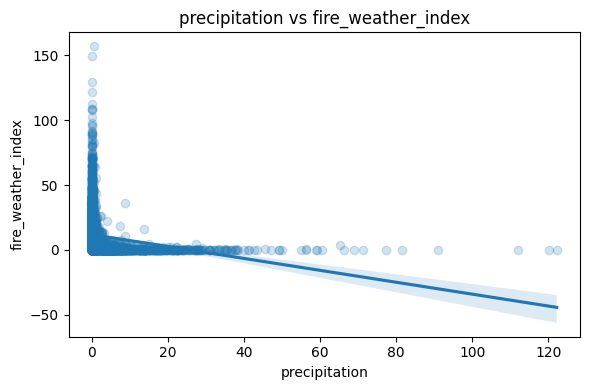

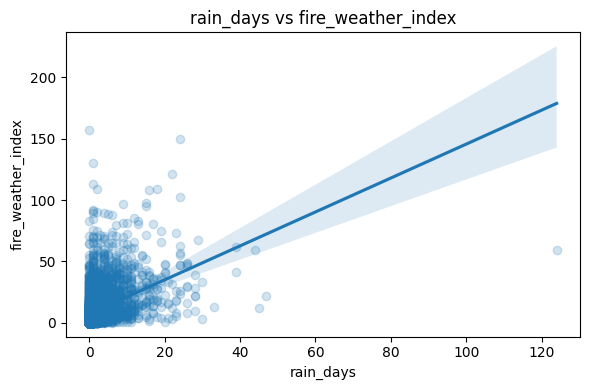

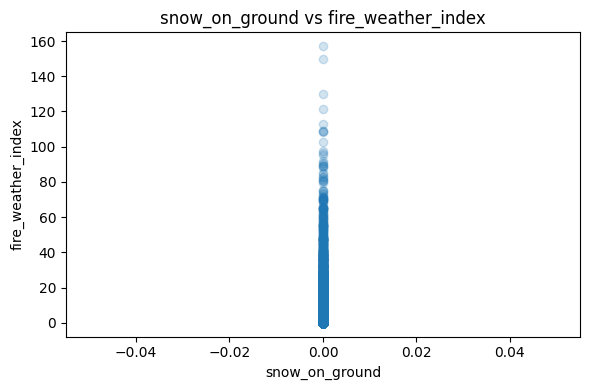

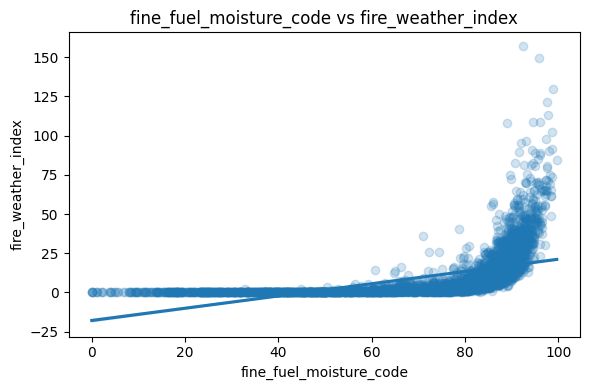

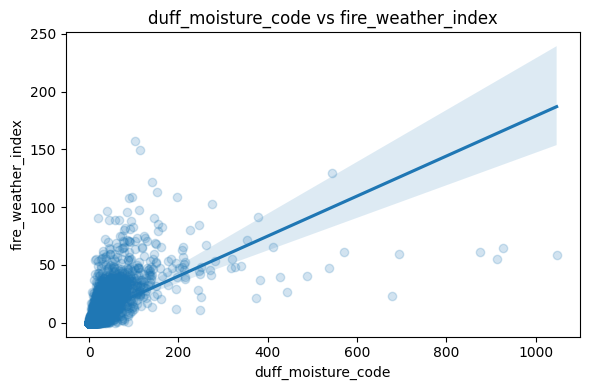

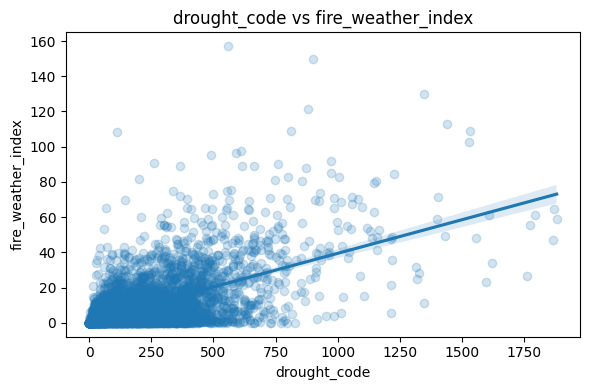

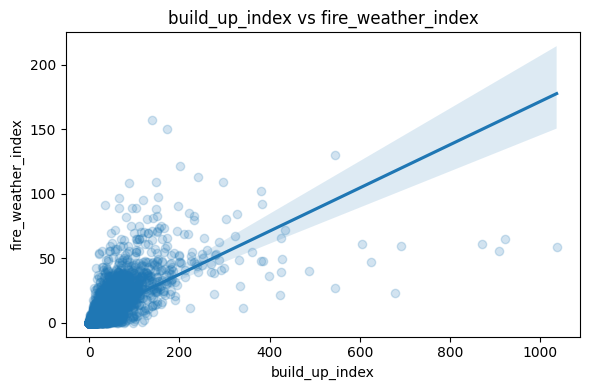

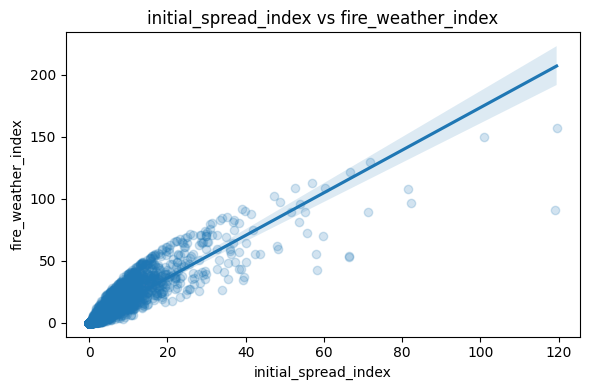

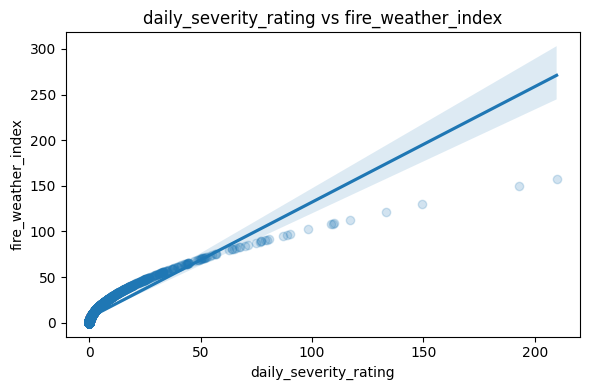

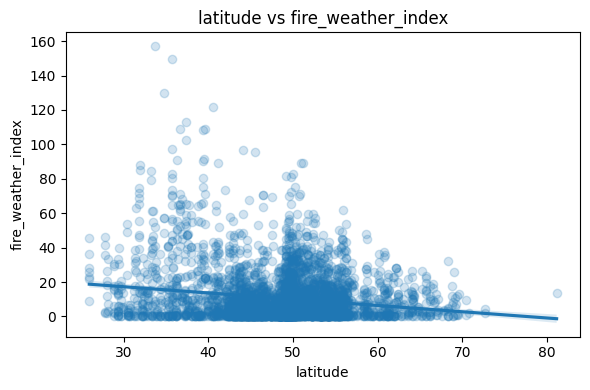

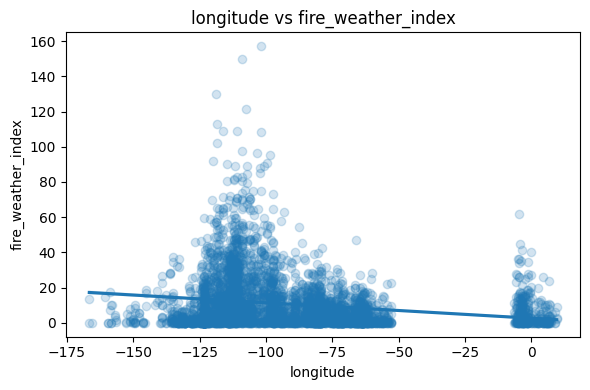

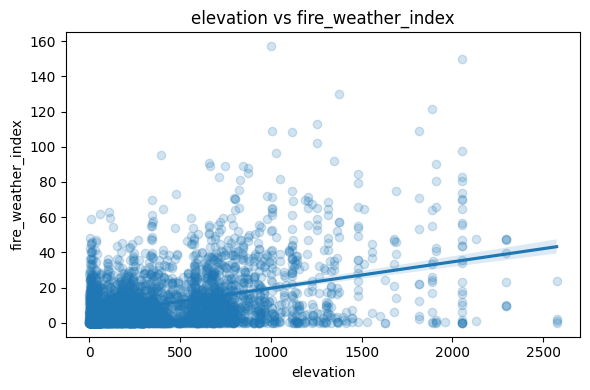

In [21]:
target = 'fire_weather_index'

numeric_data = df_sample.select_dtypes(include=['number'])
correlations = numeric_data.corr()[target].sort_values(ascending=False)
print("Correlations with target variable:\n", correlations)

# Scatter plots for each feature vs. target variable
features = [col for col in df_sample.columns if col != target and df_sample[col].dtype != 'object']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df_sample[feature], y=df_sample[target], scatter_kws={'alpha':0.2})
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


In [22]:
# Select only numeric columns
num_df = df_sample.select_dtypes(include=['number'])

# Compute Pearson and Spearman correlation matrices
pearson_corr = num_df.corr(method='pearson')
spearman_corr = num_df.corr(method='spearman')



                            Pearson                                          \
                        temperature dew_point_temperature relative_humidity   
temperature                1.000000              0.624559         -0.448800   
dew_point_temperature      0.624559              1.000000          0.381485   
relative_humidity         -0.448800              0.381485          1.000000   
wind_speed                -0.114203             -0.126053          0.005855   
wind_direction            -0.004325             -0.061146         -0.083759   
atmospheric_pressure      -0.117584             -0.183021         -0.117300   
visibility                 0.023994             -0.133990         -0.246887   
precipitation             -0.113146              0.118497          0.305882   
rain_days                  0.151235             -0.110551         -0.274755   
snow_on_ground                  NaN                   NaN               NaN   
fine_fuel_moisture_code    0.469342             -0.0

In [24]:
pearson_corr

temperature  dew_point_temperature  \
temperature                 1.000000               0.624559   
dew_point_temperature       0.624559               1.000000   
relative_humidity          -0.448800               0.381485   
wind_speed                 -0.114203              -0.126053   
wind_direction             -0.004325              -0.061146   
atmospheric_pressure       -0.117584              -0.183021   
visibility                  0.023994              -0.133990   
precipitation              -0.113146               0.118497   
rain_days                   0.151235              -0.110551   
snow_on_ground                   NaN                    NaN   
fine_fuel_moisture_code     0.469342              -0.074447   
duff_moisture_code          0.298642              -0.089948   
drought_code                0.235108              -0.101379   
build_up_index              0.334161              -0.084689   
initial_spread_index        0.325535              -0.231887   
fire_weather_index          0.435907              -0.192698   
daily_severity_rating       0.298658              -0.208824   
latitude                   -0.268419              -0.152800   
longitude                   0.017515               0.134028   
elevation                   0.075551              -0.288968   

                         relative_humidity  wind_speed  wind_direction  \
temperature                      -0.448800   -0.114203       -0.004325   
dew_point_temperature             0.381485   -0.126053       -0.061146   
relative_humidity                 1.000000    0.005855       -0.083759   
wind_speed                        0.005855    1.000000        0.151140   
wind_direction                   -0.083759    0.151140        1.000000   
atmospheric_pressure             -0.117300   -0.217849       -0.028542   
visibility                       -0.246887   -0.054608        0.036682   
precipitation                     0.305882    0.063135       -0.000267   
rain_days                        -0.274755   -0.012824       -0.007774   
snow_on_ground                         NaN         NaN             NaN   
fine_fuel_moisture_code          -0.697892   -0.016142        0.052985   
duff_moisture_code               -0.363738   -0.039770        0.000890   
drought_code                     -0.320205   -0.035017       -0.001778   
build_up_index                   -0.400040   -0.041487        0.000319   
initial_spread_index             -0.568373    0.416254        0.066501   
fire_weather_index               -0.637423    0.269946        0.051133   
daily_severity_rating            -0.466661    0.271031        0.044353   
latitude                          0.110142   -0.049313       -0.024477   
longitude                         0.108093   -0.010579       -0.085830   
elevation                        -0.368038    0.020766        0.060748   

                         atmospheric_pressure  visibility  precipitation  \
temperature                         -0.117584    0.023994      -0.113146   
dew_point_temperature               -0.183021   -0.133990       0.118497   
relative_humidity                   -0.117300   -0.246887       0.305882   
wind_speed                          -0.217849   -0.054608       0.063135   
wind_direction                      -0.028542    0.036682      -0.000267   
atmospheric_pressure                 1.000000    0.032650      -0.200840   
visibility                           0.032650    1.000000      -0.156457   
precipitation                       -0.200840   -0.156457       1.000000   
rain_days                            0.072447    0.018405      -0.182725   
snow_on_ground                            NaN         NaN            NaN   
fine_fuel_moisture_code              0.146232    0.203344      -0.588043   
duff_moisture_code                  -0.004394   -0.030218      -0.133442   
drought_code                        -0.026018    0.001664      -0.180030   
build_up_index                      -0.013565   -0.021084      -0.157219   
initia

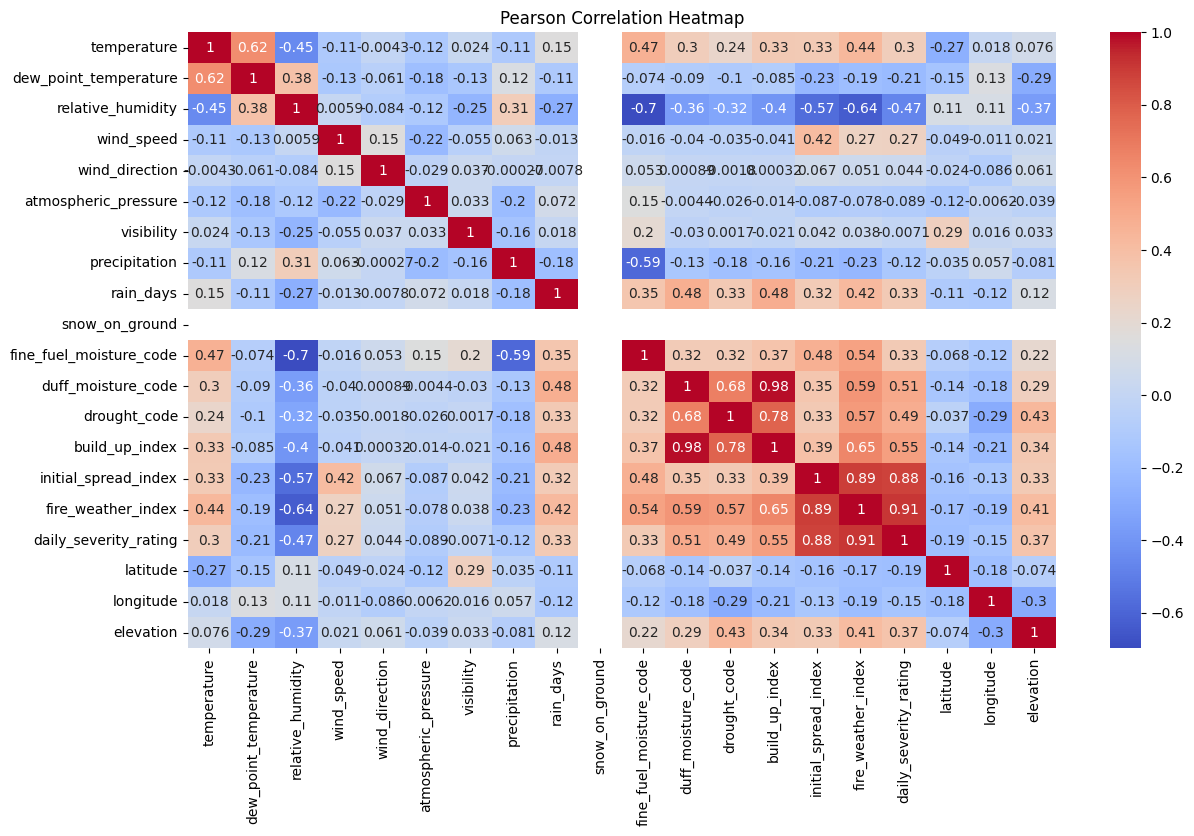

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()

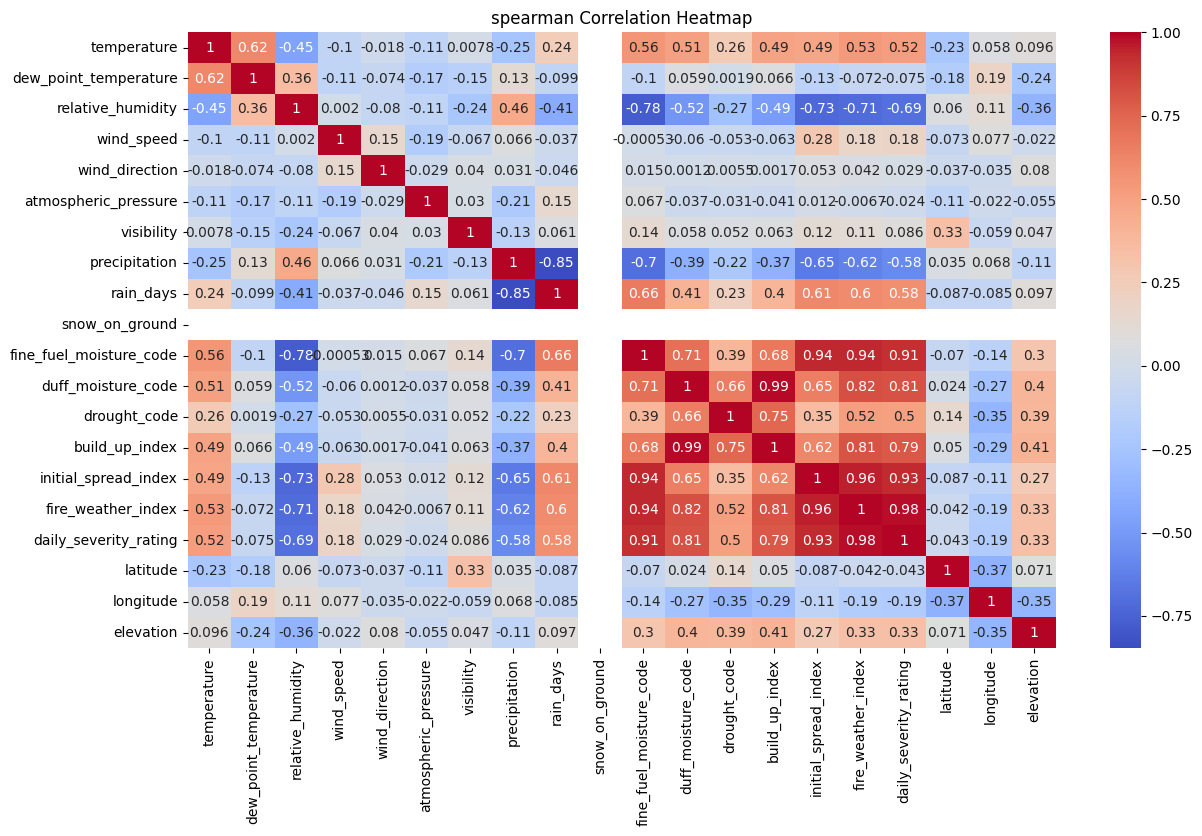

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm")
plt.title("spearman Correlation Heatmap")
plt.show()

In [29]:
#statistical analysis

In [ ]:
Histogram / KDE plot

Q–Q plot

Shapiro-Wilk test (p > 0.05 → data looks normal)

In [ ]:
Normality of numerical data

Histogram / KDE plot

Q–Q plot

Shapiro-Wilk test (p > 0.05 → data looks normal)

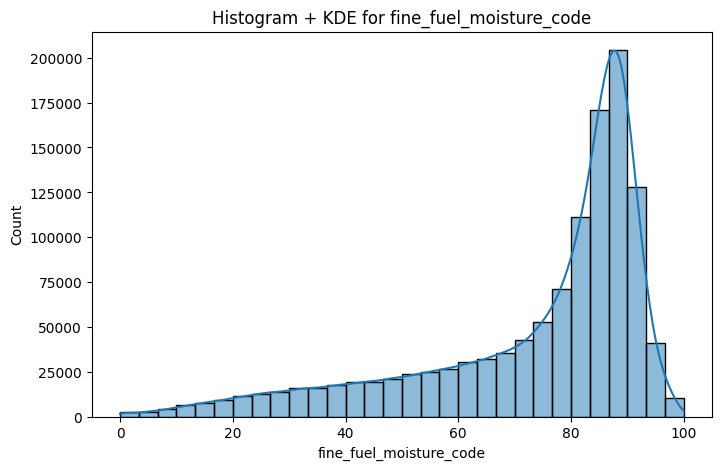

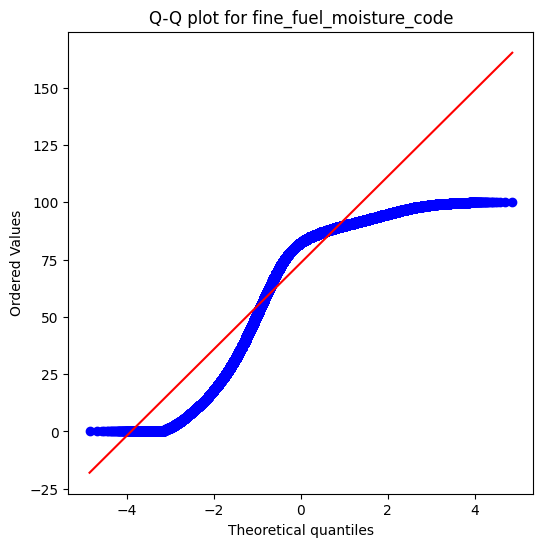

Shapiro-Wilk Test for fine_fuel_moisture_code: Statistic=0.827, p-value=0.000
Data is not normally distributed (reject H0).


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
import scipy.stats as stats

col = "fine_fuel_moisture_code" 
data_col = data[col]

# 1. Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(data_col, kde=True, bins=30)
plt.title(f"Histogram + KDE for {col}")
plt.show()

# 2. Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(data_col, dist="norm", plot=plt)
plt.title(f"Q-Q plot for {col}")
plt.show()

# 3. Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(data_col)
print(f"Shapiro-Wilk Test for {col}: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")

if shapiro_p > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

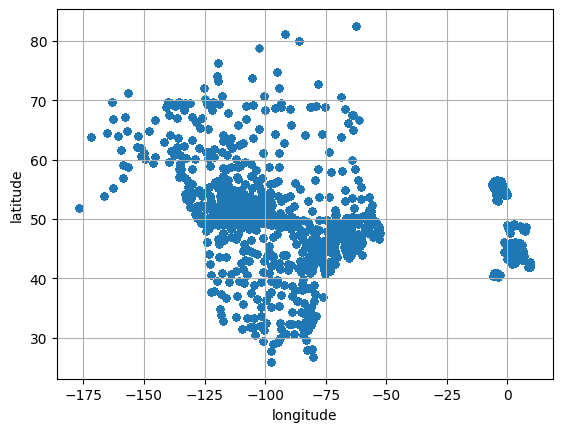

In [27]:
data.plot(kind ='scatter',y='latitude', x='longitude',grid = True)
plt.show()

In [ ]:
data.plot(kind ='scatter',y='latitude', x='longitude',grid = True, s =data['temperature'], 
          label = 'temperature', c = 'fire_weather_index', cmap = 'jet', colorbar = True,
         legend = True, figsize= (10,7))
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
